# Employee Attrition Exploratory Data Analysis

## What is Employee Attrition?
**Employee Attrition** refers to the gradual reduction of a company's workforce that occurs when employees leave the organization and are not replaced. It differs from turnover in that attrition typically implies a long-term reduction in headcount, rather than a quick replacement of the departing employee.

Attrition can happen due to:
- Voluntary resignations
- Retirements
- Internal transfers
- Workforce restructuring or downsizing

In the context of Human Resources analytics, high attrition rates can signal deeper organizational issues, such as job dissatisfaction, poor management, lack of career growth, or uncompetitive compensation. On the other hand, controlled or strategic attrition may be a result of deliberate cost-cutting or optimization.

## Why Analyze Employee Attrition?
Understanding the patterns behind employee attrition helps businesses:
- **Identify risk factors** that lead to talent loss
- **Improve employee engagement and retention**
- **Enhance workforce planning and productivity**
- **Save costs associated with hiring and training replacements**

In this project, we aim to uncover key drivers of attrition within a company by analyzing various factors such as `Department`, `Age`, `Job Satisfaction`, `Income`, `Environment`, `Tenure` and more, ultimately providing data-driven insights to improve employee retention strategies.  

The data set we used for this Exploratory Data Analysis is **Employee-Attrition-Rate** which is a public dataset found in Kaggle, in which the dataset description says that employee attrition has gone up from 14% to 25% in the last 1 year, making it a good foundation for this project.

The Dataset consists of 14710 observations. Each row in the dataset represents an employee. The columns present in the dataset are:


- Age: Age of employees
- Department: Department of work
- Distance from home
- Education: 1-Below College; 2-College; 3-Bachelor; 4-Master; 5-Doctor;
- Education Field
- Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Marital Status
- Monthly Income
- Num Companies Worked: Number of companies worked prior to IBM
- Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;
- Years At Company: Current years of service in IBM
- Attrition: Employee attrition status (0 or 1)

Dataset link: https://www.kaggle.com/datasets/prachi13/employeeattritionrate/data

# Importing Necessary Python Sub-Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.patches as mpatches

# Data Cleaning

In [2]:
#import dataset to pandas
att = pd.read_csv("Attrition Data.csv")
att

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [3]:
#check how many rows and columns there are in the dataset
att.shape

(1470, 13)

In [4]:
#count how many missing values are there in the dataset
null_count = att.isnull().sum()
null_count

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [5]:
#check if there are duplicate values in the dataset
att.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [6]:
att.duplicated().value_counts()

False    1470
Name: count, dtype: int64

In [7]:
#check the datatypes of every column in the dataset
att.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [8]:
#check the number of unique values within each column in the dataset
att.nunique()

Age                          43
Attrition                     2
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EnvironmentSatisfaction       4
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
WorkLifeBalance               4
YearsAtCompany               37
dtype: int64

In [9]:
#check the datatypes in the dataset
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [10]:
#by optimizing the dataset, let's transform columns that has small unique values and are object dtypes into categories
att["Attrition"] = att["Attrition"].astype("category")
att["Department"] = att["Department"].astype("category")
att["EducationField"] = att["EducationField"].astype("category")
att["MaritalStatus"] = att["MaritalStatus"].astype("category")

In [11]:
#double check if the dataset has been optimized and has columns transformed
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1470 non-null   int64   
 1   Attrition                1470 non-null   category
 2   Department               1470 non-null   category
 3   DistanceFromHome         1470 non-null   int64   
 4   Education                1470 non-null   int64   
 5   EducationField           1470 non-null   category
 6   EnvironmentSatisfaction  1470 non-null   int64   
 7   JobSatisfaction          1470 non-null   int64   
 8   MaritalStatus            1470 non-null   category
 9   MonthlyIncome            1470 non-null   int64   
 10  NumCompaniesWorked       1470 non-null   int64   
 11  WorkLifeBalance          1470 non-null   int64   
 12  YearsAtCompany           1470 non-null   int64   
dtypes: category(4), int64(9)
memory usage: 109.8 KB


In [12]:
#summary statistics for every numerical columns in the dataset
att.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


# Identification of Variables that are Affecting the Attrition of Employees

## Attrition Percentages in the Dataset

In [13]:
#Count of values in Attrition
att_counts = att["Attrition"].value_counts()

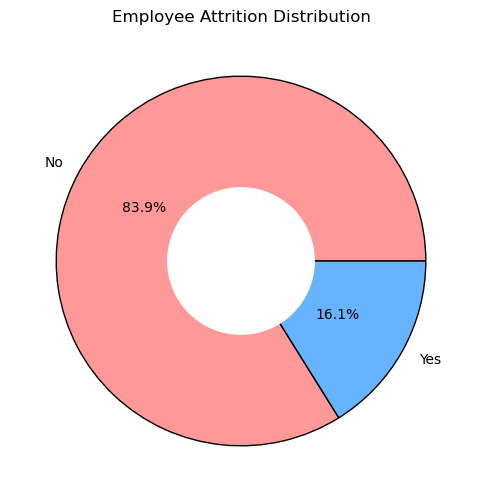

In [14]:
#setting up the donut chart
plt.figure(figsize=(6, 6))
colors = ["#ff9999", "#66b3ff"]

#create a pie chart first
plt.pie(att_counts, labels=att_counts.index, autopct="%1.1f%%", colors=colors, wedgeprops={"edgecolor":"black"})

#create center circle to resemble a donut
center_circle = plt.Circle((0, 0), 0.4, fc="white")
plt.gca().add_artist(center_circle)

#give it a title
plt.title("Employee Attrition Distribution")
plt.show()

83.9% have an Attrition of 'No' while 16.1% are 'Yes'. Let's find out what made the 16 percent leave the company.

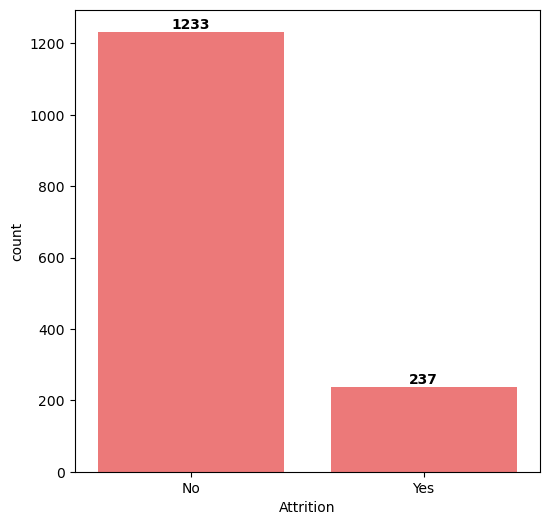

In [15]:
#Attrition Count
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=att_counts, color="#ff6666")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top
                ha="center", va="bottom", fontsize=10, fontweight="bold")

Over **1,470** employees, **237** have left the company. Let's find out what drove them to leave at such an abrupt manner.

## Age vs Attrition

- In this section, we will analyze whether Age plays a large role in the Attrition Rates of Employees. 

In [16]:
#getting the summarized statistics of both groups ("Attrition" & "Age")
att.groupby("Attrition", observed=True)["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
Yes,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


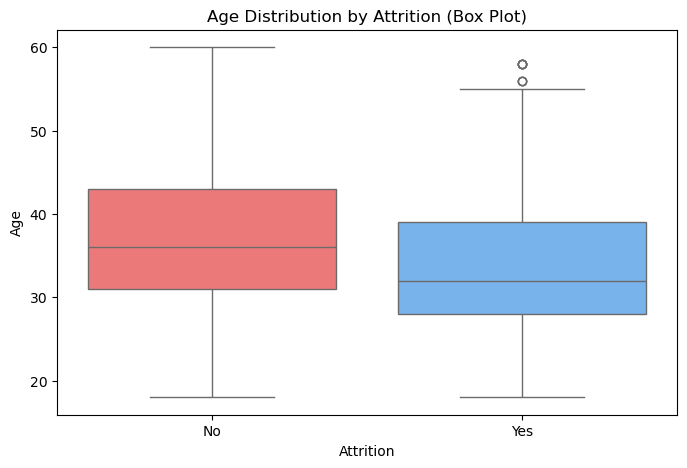

In [17]:
#Visualizing the results
plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="Age", data=att, hue="Attrition",  palette=["#ff6666", "#66b3ff"])
plt.title("Age Distribution by Attrition (Box Plot)")
plt.show()

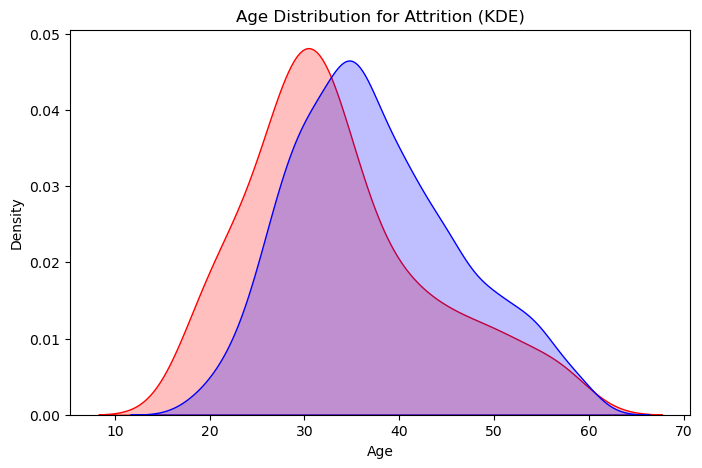

In [18]:
plt.figure(figsize=(8, 5))
sns.kdeplot(att[att["Attrition"] == "Yes"]["Age"], label="Attrition: Yes", fill=True, color="red")
sns.kdeplot(att[att["Attrition"] == "No"]["Age"], label="Attrition: Yes", fill=True, color="blue")
plt.title("Age Distribution for Attrition (KDE)")
plt.show()

It is shown that employees ranging from the age of 28-39 are most likely the ones to leave the company judging from the graph and the statistical results using the "describe" method. A trend is noticeable as Attrition is more common in this age range.

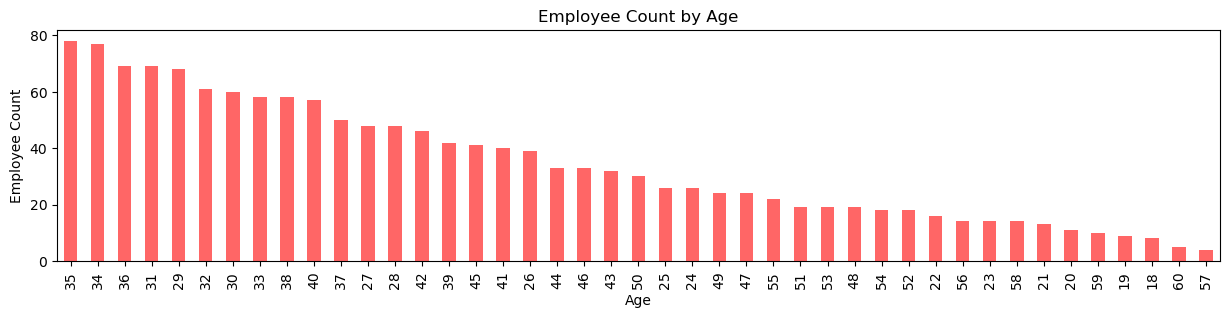

In [19]:
att["Age"].value_counts().plot(kind="bar", figsize=(15, 3), fontsize=10, color="#ff6666")

plt.ylabel("Employee Count")
plt.title("Employee Count by Age")
plt.show()

30-40 is the most common age of group in the company.

### Attrition Rate per Age Group

In [20]:
#Defining Age Bins
bins = [18, 25, 30, 35, 40, 45, 50, 60]
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50+"]

#Create AgeGroup column
att["AgeGroup"] = pd.cut(att["Age"], bins=bins, labels=labels, right=False)

In [21]:
#Calculate attrition rate per Age Group
attrition_by_age = att.groupby("AgeGroup", observed=True)["Attrition"].value_counts(normalize=True).unstack() * 100

#Rename columns for clarity
attrition_by_age.columns = ["Stayed (%)", "Left (%)"]

#Display the table
attrition_by_age

,Stayed (%),Left (%)
AgeGroup,,
18-24,60.824742,39.175258
25-29,76.855895,23.144105
30-34,81.846154,18.153846
35-39,89.898990,10.101010
40-44,89.903846,10.096154
45-49,90.780142,9.219858
50+,86.309524,13.690476


In [22]:
#reset index for plotting
attrition_by_age_reset = attrition_by_age.reset_index()

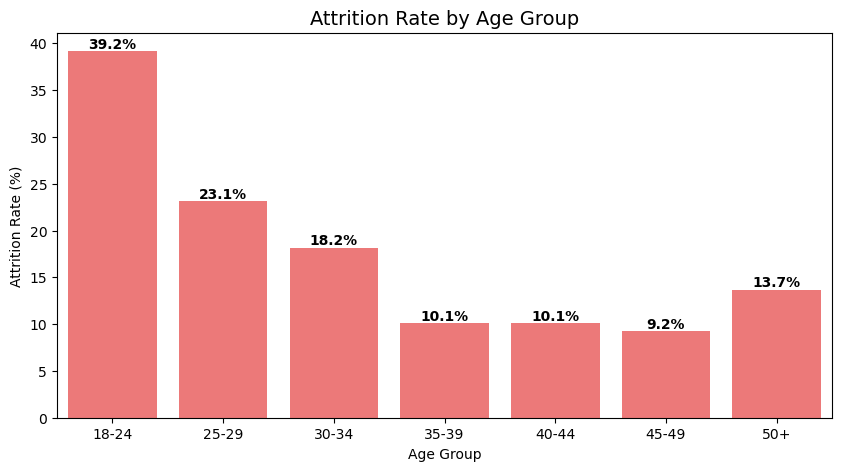

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="AgeGroup", y="Left (%)", data=attrition_by_age_reset, color="#ff6666")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top
                ha="center", va="bottom", fontsize=10, fontweight="bold")


plt.title("Attrition Rate by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate (%)")
plt.show()

Employees with the age range of 18-24 had the highest percentage of Attrition with 39.2%, the younger employees we're the most affected in Attrition, indicating a possibility of mid-career growth, change or reduction in company workload.

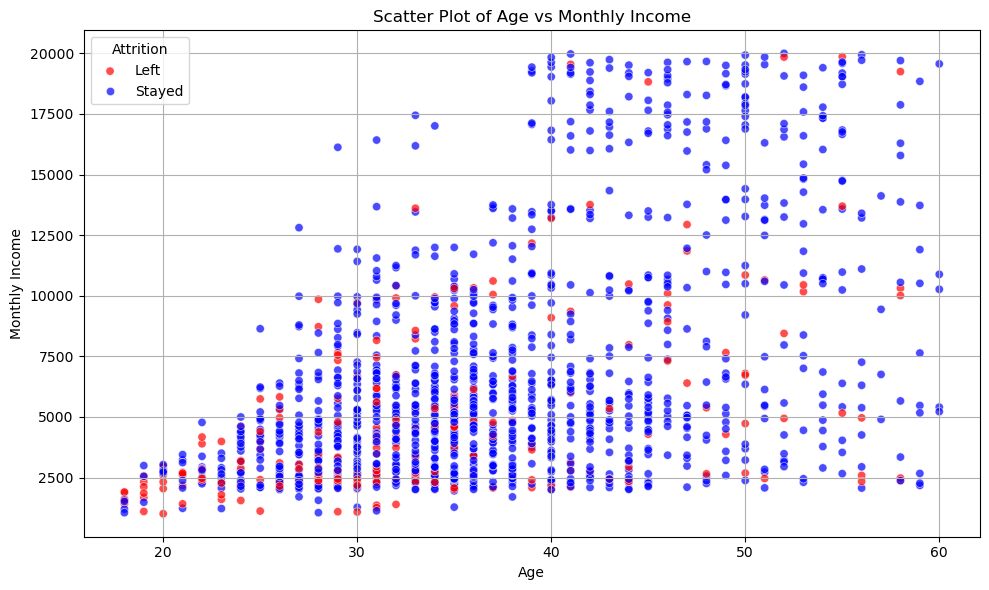

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=att, x="Age", y="MonthlyIncome", alpha=0.7, hue="Attrition", palette={"Yes": "red", "No": "blue"})

plt.title("Scatter Plot of Age vs Monthly Income")
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.legend(title="Attrition", labels=["Left", "Stayed"])
plt.grid(True)
plt.tight_layout()
plt.show()

As seen in our scatterplot, most of the attrited employees were at the younger side ranging from 18-40. Also a clear depiction that younger employees below 40 have lower salary compared to employees with an age above 40. Could also be a driving motive to why these younger employees have left the company.

## Distance from Home vs Attrition

- Moving on, let's start with our analysis of Distance as a factor for Attrition rates.
- Using the describe function, we can conclude that the nearest employee has a distance of 1 from the workplace and the max is 29.

In [25]:
att.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [26]:
att.groupby("Attrition", observed=True)["DistanceFromHome"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Yes,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


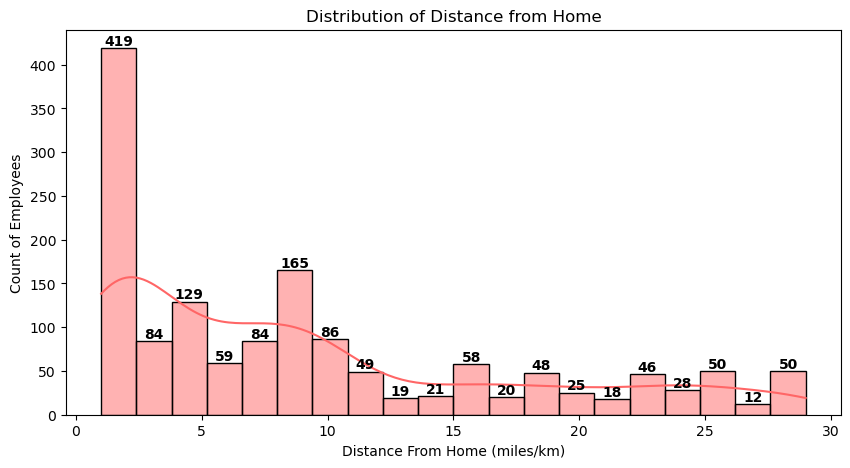

In [27]:
#Let's create a histogram explaining the distribution of distance from home
plt.figure(figsize=(10, 5))
ax = sns.histplot(att["DistanceFromHome"], bins=20, kde=True, color="#ff6666")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top
                ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Distance From Home (miles/km)")
plt.ylabel("Count of Employees")
plt.title("Distribution of Distance from Home")
plt.show()

Majority of the employees working in the company live closer to their workplace.

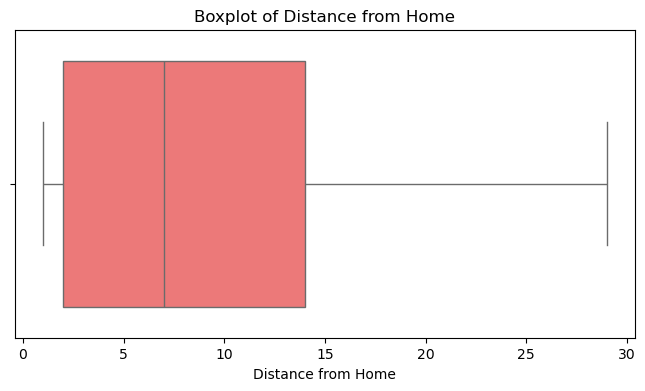

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=att["DistanceFromHome"], color="#ff6666")
plt.xlabel("Distance from Home")
plt.title("Boxplot of Distance from Home")
plt.show()

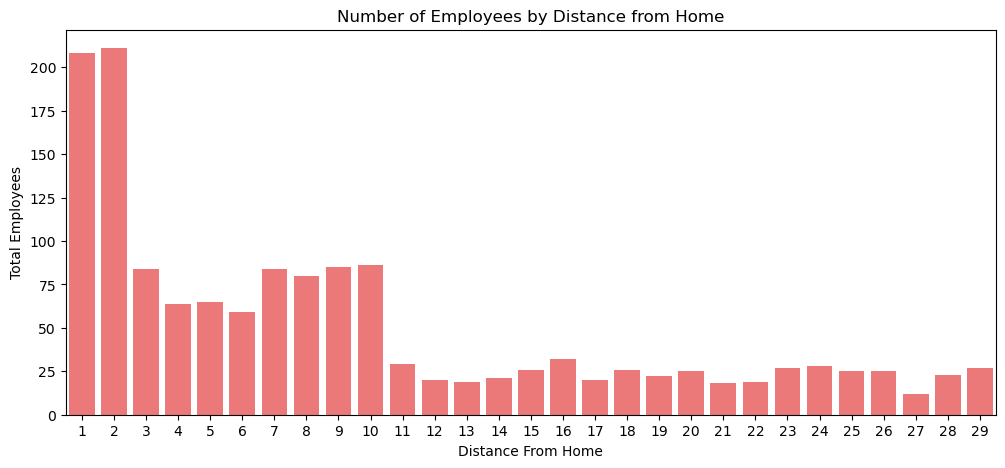

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=att, x="DistanceFromHome", color="#ff6666")
plt.xlabel("Distance From Home")
plt.ylabel("Total Employees")
plt.title("Number of Employees by Distance from Home")
plt.xticks(rotation=0)
plt.show()

It is seen with the countplot above that many employees prefer to live near the workplace, or applied to the company as it was nearer to where they reside.

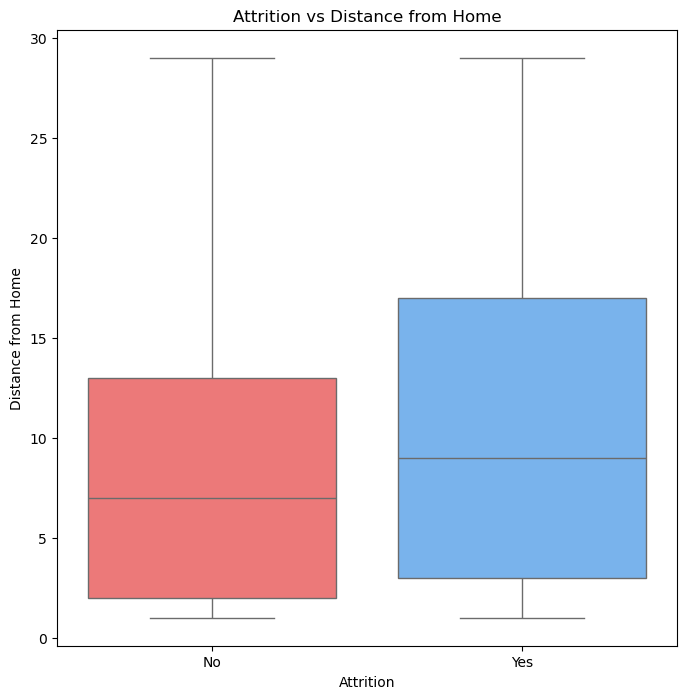

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Attrition", y="DistanceFromHome", hue="Attrition", data=att, palette=["#ff6666","#66b3ff"])
plt.xlabel("Attrition")
plt.ylabel("Distance from Home")
plt.title("Attrition vs Distance from Home")
plt.show()

Employees who left lives slightly farther from the workplace, although the data shown is not really convincing, we'll try to dig deeper.

In [31]:
#get the correlation values between Attrition and Distance From Home

#first convert the values in Attrition to numerical numbers
att['Attrition'] = att['Attrition'].str.strip()
att['Attrition'] = att['Attrition'].map({"Yes": 1, "No": 0})

#then by using the corr function, we can get their correlation values
att[["DistanceFromHome", "Attrition"]].corr()

,DistanceFromHome,Attrition
DistanceFromHome,1.000000,0.077924
Attrition,0.077924,1.000000


With a correlation of 0.0779244, Distance vs Attrition correlation is very weak. It suggest that Distance has a weak relationship with Attrition.

To have a more in-depth result with correlation, we used the Pearson Correlation Test.

In [32]:
corr, p_value = pearsonr(att["Attrition"], att["DistanceFromHome"])
print(f"Correlation: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Correlation: 0.078
P-value: 0.00279


With these values, having a p-value of 0.00279, there is a relationship as 0.00279 is relatively smaller compared to 0.05. However, our Correlation Coefficient is 0.078. Despite having a significant relationship, it is not strong enough to practically have meaning.

## Monthly Income vs Attrition

- Moving on to our next analysis, we're going to find whether Monthly Income is a bigger factor compared to the other 2 variables we've tackled.
- As per real-world experiences, income can be a major factor as most people tend to look for higher paying salary jobs due to unsatisfaction.

In [33]:
#get the summarized statistics of Monthly Income and Attrition
att.groupby("Attrition", observed=True)["MonthlyIncome"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
1,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


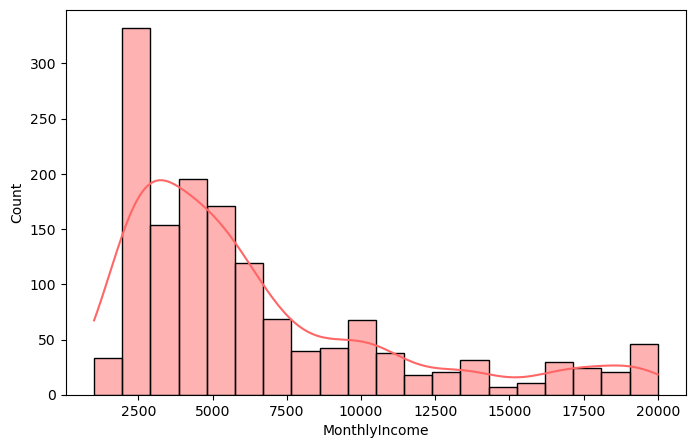

In [34]:
#Create a Histogram to see the average salary within the employees
plt.figure(figsize=(8, 5))
sns.histplot(data=att, x="MonthlyIncome", kde=True, bins=20, color="#ff6666")
plt.show()

As shown in our Histogram, the results are heavily skewed to the left. Indicating that majority of every employee's salary lies in the 2000-6500.

#### Attrition Percentages in Income Groups (Low Salary, Mid Salary, High Salary)

- We labeled the salary and group them in Low, Mid and High categories in order to visualize these results.
- Our basis for these groupings are taken from the summarized statistical results we got from using the `describe` function on the MonthlyIncome column having the lowest salary as 1,009 and the highest as 19,999.
- With this, we split the bins to 1000, 7000, 14000, 20000 letting pandas compute which is which by adding the labels Low, Mid and High.
- Pandas automatically categorize Low Salary as MonthlyIncome >= 1000 and < 7000, Mid Salary as MonthlyIncome >= 7000 and < 14000, High Salary as MonthlyIncome >=14000 and < 20000.

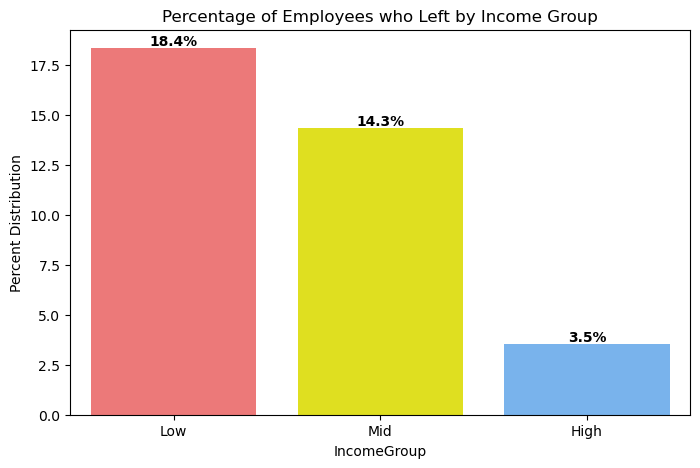

In [35]:
#let's define income groups
bins = [1000, 7000, 14000, 20000]
labels = ["Low", "Mid", "High"]

#categorize employees into their respective income groups
att["IncomeGroup"] = pd.cut(att["MonthlyIncome"], bins=bins, labels=labels, right=False)

#calculate the attrition rate per income group
attr_rate = att.groupby("IncomeGroup", observed=True)["Attrition"].value_counts(normalize=True).unstack() * 100

#create a barplot to visualize the results
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=attr_rate.index, y=attr_rate[1], hue=attr_rate.index, palette=["#ff6666", "yellow", "#66b3ff"])

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top
                ha="center", va="bottom", fontsize=10, fontweight="bold")


plt.xlabel("IncomeGroup")
plt.ylabel("Percent Distribution")
plt.title("Percentage of Employees who Left by Income Group")
plt.xticks(rotation=0)
plt.show()

Most of the Employees who left the company lies in the Low earning salary side. Having an Attrition Rate of 17.5%.

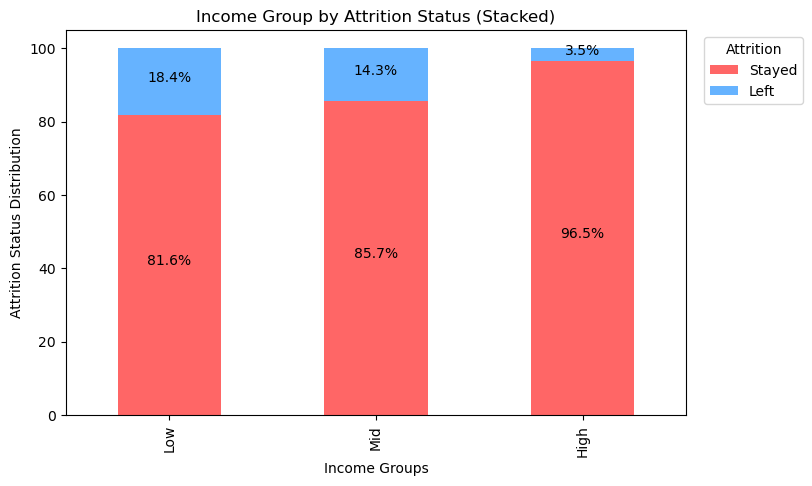

In [36]:
#color scheme
colors = ["#ff6666", "#66b3ff"]

#design the Stacked bar plot
ax = attr_rate[[0, 1]].plot(kind="bar", stacked=True, color=colors, figsize=(8, 5))

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=3)

plt.ylabel("Attrition Status Distribution")
plt.xlabel("Income Groups")
plt.title("Income Group by Attrition Status (Stacked)")
plt.legend(["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

This could indicate low-satisfaction on their Salary and looked for a higher-paying job.

#### Average Monthly Income of Employees who Left vs. Stayed

- With the results above, I wanted to dig even deeper on this case.
- By getting the mean of the employees who left and stayed, we can see whether the reason for leaving was the satisfaction of their income.

In [37]:
#let's look at the mean of income from employees who left and stayed at the company.
att.groupby("Attrition")["MonthlyIncome"].mean()

Attrition
0    6832.739659
1    4787.092827
Name: MonthlyIncome, dtype: float64

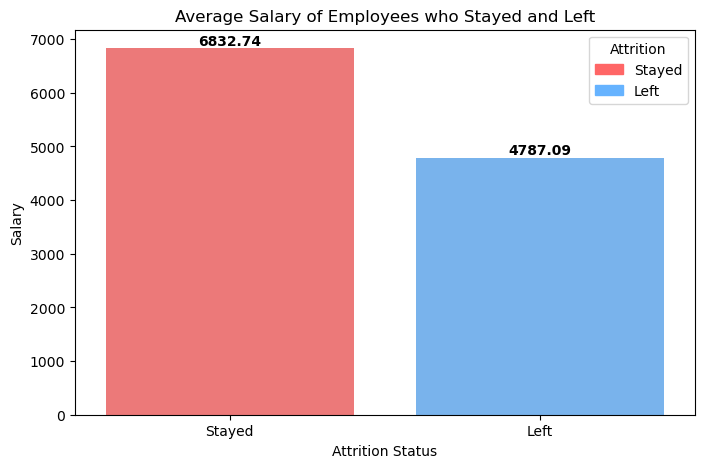

In [38]:
income_by_attrition = pd.Series({
    "Stayed": 6832.74, 
    "Left": 4787.09
})

#bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=income_by_attrition.index, y=income_by_attrition.values, hue=income_by_attrition.index, palette=["#ff6666", "#66b3ff"])

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",  # Format to 1 decimal place
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position at center top
                ha="center", va="bottom", fontsize=10, fontweight="bold")

#legend
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colors[0]), 
                     plt.Rectangle((0, 0), 1, 1, color=colors[1])], 
           labels=["Stayed", "Left"], title="Attrition", loc="upper right")

#labels
plt.title("Average Salary of Employees who Stayed and Left")
plt.ylabel("Salary")
plt.xlabel("Attrition Status")
plt.show()

As you can see, most of the employees who left the company had a lower average salary than the ones who stayed. This could be a driving point to the high-attrition rates.

## Job Satisfaction vs Attrition 

- The Dataset contains Job Satisfaction ratings from 1 (Low) to 4 (High)
- In this section we're going to find if satisfaction levels differ between employees who stayed vs who left.
- Check if Job Satisfaction correlates with Work-life balance, Environment Satisfaction or Years at the company.

In [39]:
att["JobSatisfaction"].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

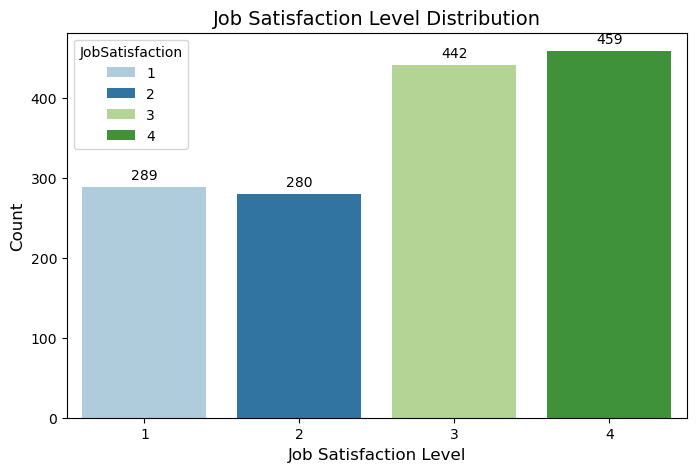

In [40]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create countplot
sns.countplot(x="JobSatisfaction", data=att, hue="JobSatisfaction", palette="Paired")

# Formatting
plt.title("Job Satisfaction Level Distribution", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)

# Add data labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10, padding=3)

plt.show()

Most of the employees had a satisfaction level of 4, indicating they were very much satisfied with their work.

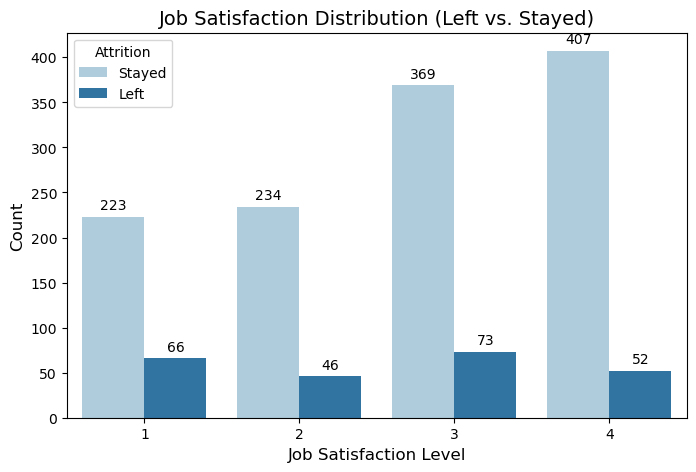

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x="JobSatisfaction", hue="Attrition", data=att, palette="Paired")

plt.title("Job Satisfaction Distribution (Left vs. Stayed)", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Attrition", labels=["Stayed", "Left"])

# Add data labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10, padding=3)

plt.show()

Stacked column chart of the total count of employees, now considering the attrition status. Despite leaving the company, 73 employees had a job satisfaction of 3.

In [42]:
#stastical summarization
att.groupby("Attrition", observed=True)["JobSatisfaction"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0
1,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [43]:
#computation job satisfaction distribution for attrition groups
job_satisfaction_ct = pd.crosstab(att["JobSatisfaction"], att["Attrition"], normalize="columns") * 100
job_satisfaction_ct

Attrition,0,1
JobSatisfaction,,
1,18.085969,27.848101
2,18.978102,19.409283
3,29.927007,30.801688
4,33.008921,21.940928


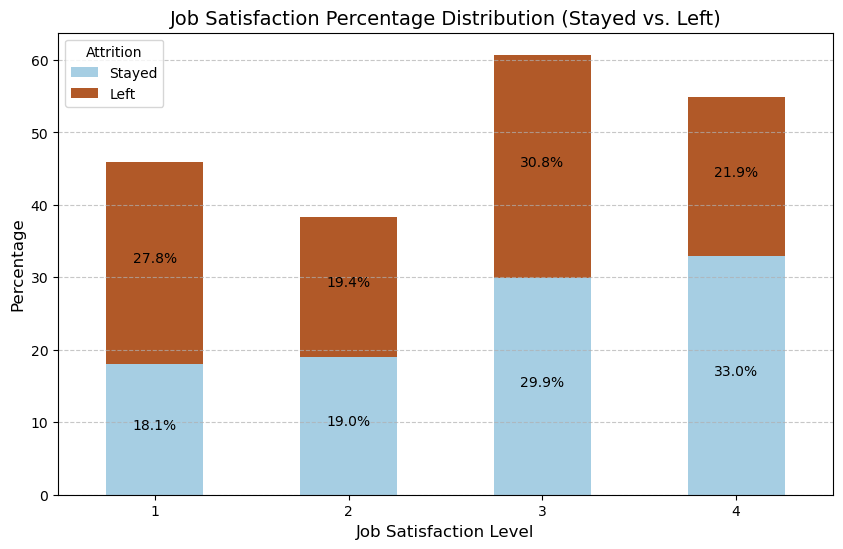

In [44]:
#plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
job_satisfaction_ct.plot(kind="bar", stacked=True, colormap="Paired", ax=ax)


plt.title("Job Satisfaction Percentage Distribution (Stayed vs. Left)", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"], title="Attrition")
plt.grid(axis="y", linestyle="--", alpha=0.7)

def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=3)

add_labels(ax)
plt.show()

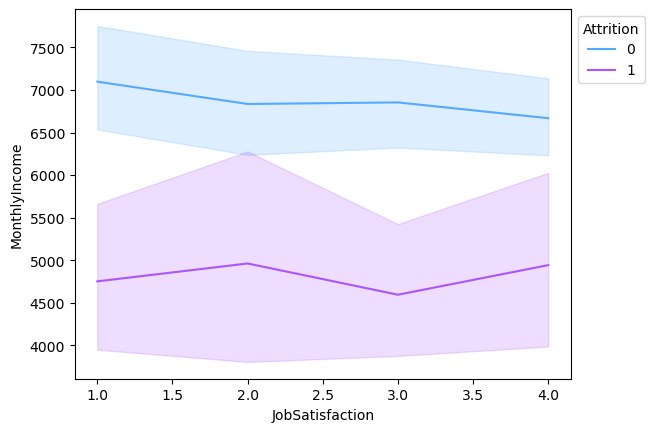

In [45]:
sns.lineplot(data=att, x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", palette="cool")
plt.legend(title="Attrition", loc="upper left", bbox_to_anchor=(1, 1))

Monthly income for those who left was low as shown in this lineplot. Could be an underlying reason even though 30% of the employees who left had a Job Satisfaction rating of 3.

## Education vs Attrition

- In our dataset, we have an Education column with a value range from 1 to 5, 1 as "Below College", 2 as "College", 3 as "Bachelor", 4 as "Masters", 5 as "Doctor".
- We want to see whether Education level played a big part in the attrition of employees.

In [46]:
educ_counts = att["Education"].value_counts()
index_names = {
    1:"Below College",
    2:"College",
    3:"Bachelor",
    4:"Master",
    5:"Doctor"
}
educ_counts_renamed = educ_counts.rename(index=index_names)

In [47]:
att.groupby("Attrition", observed=True)["Education"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
1,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0


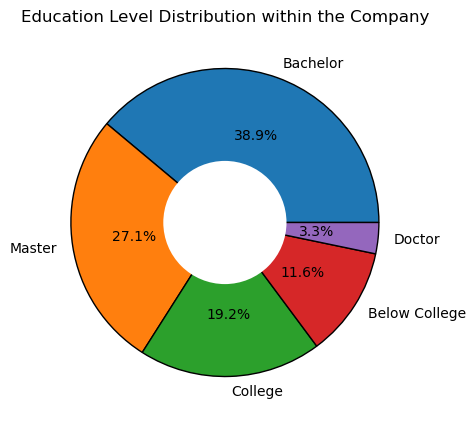

In [48]:
plt.figure(figsize=(8, 5))
plt.pie(x=educ_counts, labels=educ_counts_renamed.index, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc="white")
plt.gca().add_artist(center_circle)
plt.title("Education Level Distribution within the Company")
plt.show()

Most of the employees in the company are Bachelor Degree Holders (`38.9%`), followed by Masteral (`27.1%`), then College Undergraduates (`19.2%`), then Below College (`11.6%`), and lastly Doctorate education level (`3.3%`). This indicates that the company prioritizes degree holders when hiring employees.

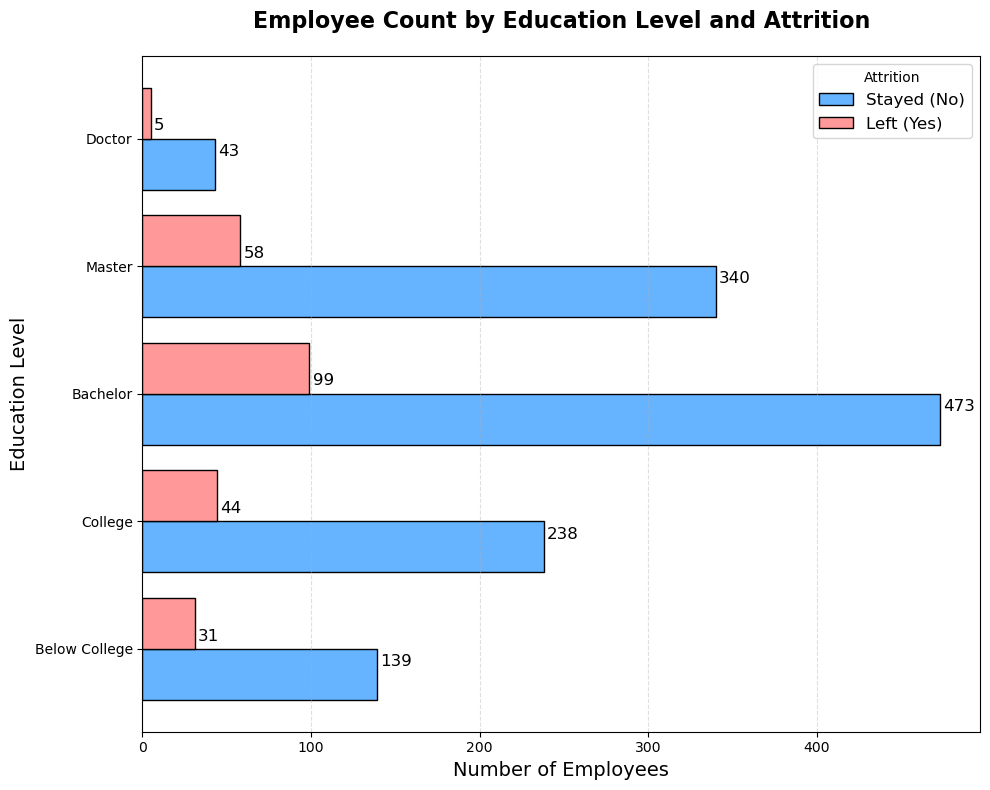

In [49]:
# Your data preparation
attrition_counts = att.groupby(['Education', 'Attrition']).size().unstack()
attrition_counts.index = attrition_counts.index.map(index_names)

# Create figure with explicit size
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
attrition_counts.plot(
    kind='barh',
    ax=ax,
    stacked=False,
    color=['#66b3ff', '#ff9999'],
    edgecolor='black',
    width=0.8
)

# Customizations
ax.set_title("Employee Count by Education Level and Attrition", 
             pad=20, fontweight='bold', fontsize=16)
ax.set_xlabel("Number of Employees", fontsize=14)
ax.set_ylabel("Education Level", fontsize=14)
ax.legend(title="Attrition", labels=["Stayed (No)", "Left (Yes)"], 
          frameon=True, fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Data labels
for i, (stay, leave) in enumerate(zip(attrition_counts[0], attrition_counts[1])):
    ax.text(stay + 2, i - 0.1, f"{stay}", ha='left', va='center', fontsize=12)
    ax.text(leave + 2, i + 0.1, f"{leave}", ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In this clustered bar plot, we separated the employees who left and stayed by Education level. Most of the employees who left were in the `Bachelor` group with 99 of them, followed by the `Master` group with 58, then the `College` group with 44, `Below College` with 31 and lastly the `Doctor` educational level employees with only 5. 

## Education Field vs Attrition

- In our Education Field column, we have nominal data. There are 6 categories of Educational Field, These are: `Human Resources`, `Life Sciences`, `Marketing`, `Medical`, `Technical Degree` and `Other`.

- With this data, we can create our own Summary Statistics of each educational field and their attrition rate (%).

In [50]:
educ_field = att["EducationField"].value_counts()
index_names = {
     "Human Resources": "Human Resources",
    "Life Sciences": "Life Sciences", 
    "Marketing": "Marketing",
    "Medical": "Medical",
    "Technical Degree": "Technical Degree",
    "Other": "Other"
}
educ_field_renamed = educ_field.rename(index=index_names)

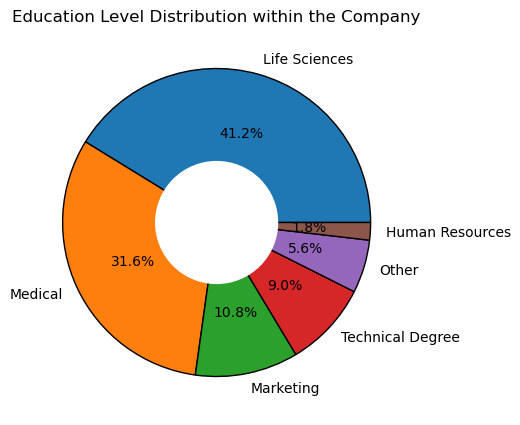

In [51]:
plt.figure(figsize=(8, 5))
plt.pie(x=educ_field, labels=educ_field_renamed.index, autopct="%1.1f%%", wedgeprops={"edgecolor":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc="white")
plt.gca().add_artist(center_circle)
plt.title("Education Level Distribution within the Company")
plt.show()

This is the total distribution of employees by their Education Field in the company. Most of the employees lie in the Life Sciences field with `41.2%` of them, followed by the Medical field with `31.6%`, then Marketing with `10.8%`, then Technical degree with `9.0%`, then Other with `5.6%` and lastly Human Resources with `1.8%`.

Now let's check the Attrition Rates in each field.

In [52]:
#calcualte counts and attrition rates
edu_field = att["EducationField"].value_counts().reset_index()
attrition_rates = att.groupby("EducationField", observed=False)["Attrition"].mean() * 100

#combine into one dataframe
edu_attrition = pd.merge(
    edu_field,
    attrition_rates.rename("Attrition Rate (%)").reset_index(),
    on="EducationField"
).rename(columns={
    "count": "Total Employees"
}).sort_values("Attrition Rate (%)", ascending=False)

In [53]:
#display the summarization
edu_attrition

,EducationField,Total Employees,Attrition Rate (%)
5,Human Resources,27,25.925926
3,Technical Degree,132,24.242424
2,Marketing,159,22.012579
0,Life Sciences,606,14.686469
1,Medical,464,13.577586
4,Other,82,13.414634


In [54]:
data2 = {
    "EducationField": ["Human Resources", "Technical Degree", "Marketing", "Life Sciences", "Medical", "Other"],
    "Total Employees": [27, 132, 159, 606, 464, 82],
    "Attrition Rate (%)": [25.9, 24.2, 22.0, 14.7, 13.5, 13.4],
    "Num of Employees who Left": [7, 32, 35, 89, 63, 11] #using the formula: total * rate / 100
}
df=pd.DataFrame(data2).sort_values("Attrition Rate (%)", ascending=False)
df

,EducationField,Total Employees,Attrition Rate (%),Num of Employees who Left
0,Human Resources,27,25.9,7
1,Technical Degree,132,24.2,32
2,Marketing,159,22.0,35
3,Life Sciences,606,14.7,89
4,Medical,464,13.5,63
5,Other,82,13.4,11


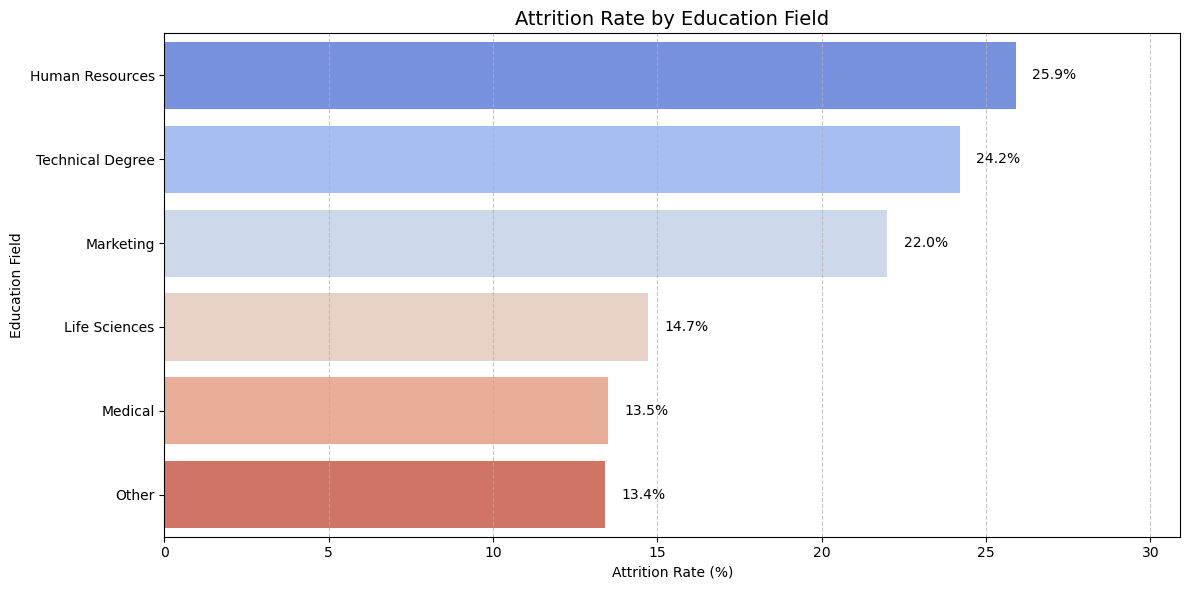

In [55]:
#plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x="Attrition Rate (%)",
    y="EducationField",
    data=df,
    hue="EducationField",
    legend=False,
    palette="coolwarm"
)

#data labels
for i, (rate, edu) in enumerate(zip(df["Attrition Rate (%)"], df["EducationField"])):
    barplot.text(rate + 0.5, i, f"{rate}%", va="center", fontsize=10)

plt.title("Attrition Rate by Education Field", fontsize=14)
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Education Field")
plt.xlim(0, max(df["Attrition Rate (%)"]) + 5)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In the data labels, we shown the attrition rates of each education field. **Marketing**, **Technical Degree** and **Human Resources** have high Attrition rates. Let's check how many employees are left within these fields after attrition.

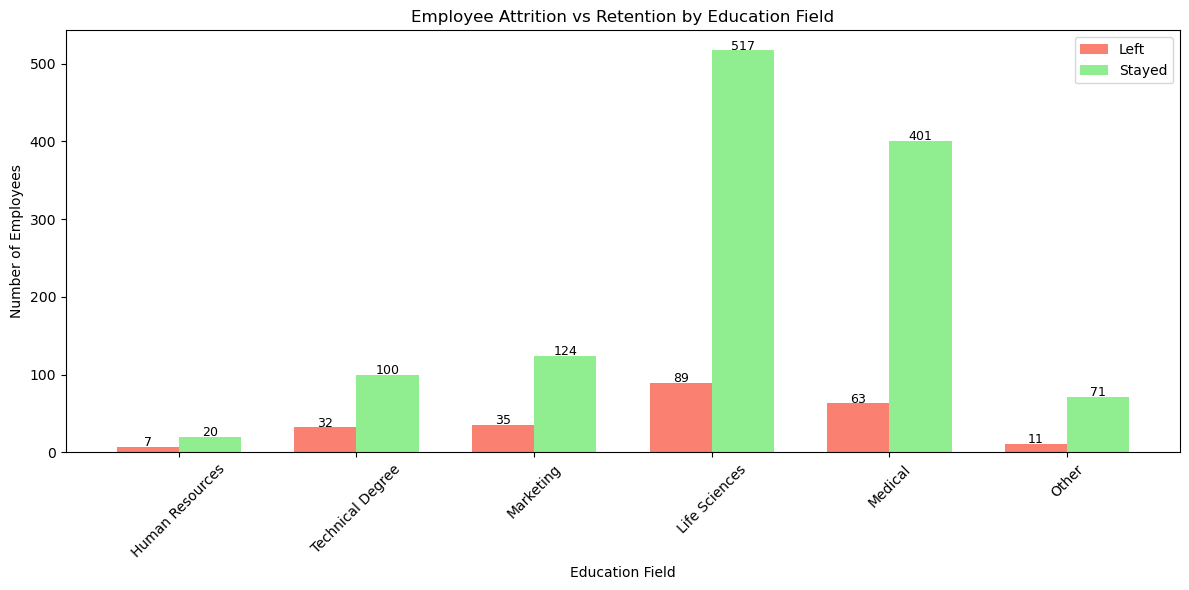

In [56]:
#calculate the number of employees who stayed
df["Num of Employees who Stayed"] = df["Total Employees"] - df["Num of Employees who Left"]

#position for bars
x = np.arange(len(df["EducationField"]))
width = 0.35

#plot
plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width/2, df["Num of Employees who Left"], width, label="Left", color="salmon")
bar2 = plt.bar(x + width/2, df["Num of Employees who Stayed"], width, label="Stayed", color="lightgreen")

#labels and title
plt.title("Employee Attrition vs Retention by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Number of Employees")
plt.xticks(x, df["EducationField"], rotation=45)
plt.legend()

#datalabels
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(height)}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

The top 3 highest Attrition Rated Education fields needs to be studied more. Let's see if Job Satisfaction played a role in their Attrition.

### Education Field vs Attrition and Job Satisfaction

- We could pull out meaningful insights if Job Satisfaction aligns with the high Attrition Rates on the Human Resources, Technical Degree and Marketing fields.

In [57]:
#Filter the data to include only the top 3 education fields
top_fields = ["Human Resources", "Technical Degree", "Marketing"]
filtered_df = att[att["EducationField"].isin(top_fields)].copy()

#Since we're dealing with a Category column, convert the education field column to categorical with only the top 3 categories 
filtered_df["EducationField"] = pd.Categorical(filtered_df["EducationField"], categories=top_fields)

In [58]:
#group the filtered data byb educationfield, jobsatisfaction and attrition
job_sat_counts = (
    filtered_df.groupby(["EducationField", "JobSatisfaction", "Attrition"], observed=False).size().reset_index(name="Count")
)

#ensure that only the top fields are present (confirming filtering)
print("Unique Education Fields after Grouping:", job_sat_counts["EducationField"].unique())

Unique Education Fields after Grouping: ['Human Resources', 'Technical Degree', 'Marketing']
Categories (3, object): ['Human Resources', 'Technical Degree', 'Marketing']


In [59]:
job_sat_counts

,EducationField,JobSatisfaction,Attrition,Count
0,Human Resources,1,0,2
1,Human Resources,1,1,4
2,Human Resources,2,0,7
3,Human Resources,2,1,1
4,Human Resources,3,0,4
5,Human Resources,3,1,1
6,Human Resources,4,0,7
7,Human Resources,4,1,1
8,Technical Degree,1,0,16
9,Technical Degree,1,1,10


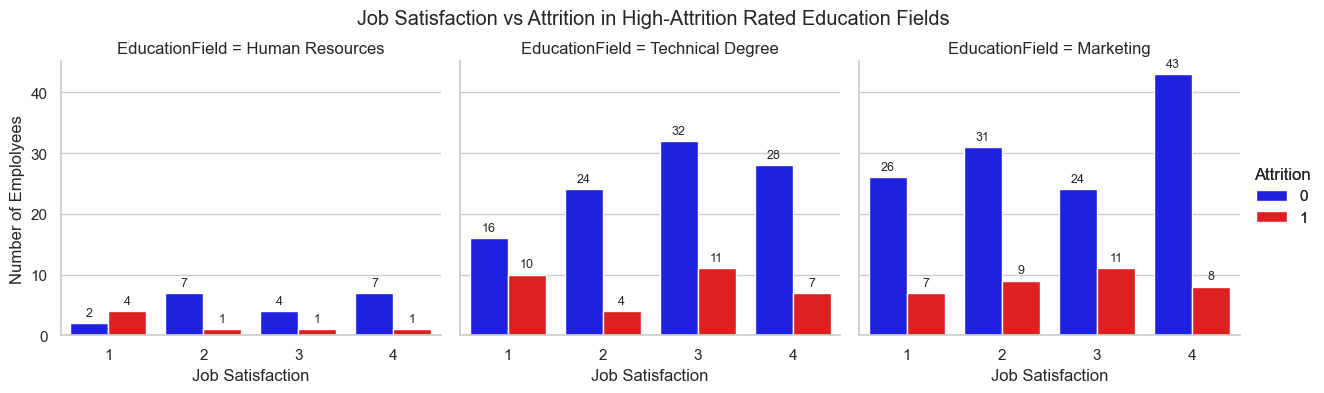

In [60]:
sns.set(style="whitegrid")
g = sns.catplot(
    data=job_sat_counts,
    kind="bar",
    x="JobSatisfaction", y="Count",
    hue="Attrition",
    col="EducationField",
    palette={0: "blue", 1: "red"},
    height=4, aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Job Satisfaction vs Attrition in High-Attrition Rated Education Fields")
g.set_axis_labels("Job Satisfaction", "Number of Emplolyees")
g.add_legend(title="Attrition")

#add data labels
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0: #only label bars with positive height
            ax.annotate(
                f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), #3 points vertical offset
                textcoords="offset points",
                ha="center", va="bottom",
                fontsize=9
            )

plt.show()

In this plot, `0` is **No** Attrition and `1` is **Yes** Attrition.

- In **Human Resources**, employees with a Job Satisfaction of `1` had 4 of them leaving the company while 2 stayed, however in the `2`, `3` and `4` Job Satisfaction rating category, only 1 employee in each rating left the company. Totaling 7 employees (26% Attrition Rate).
- In **Technical Degree**, 10 employees attrited had a Job Satisfaction rating of `1`, while 4 employees attrited had a rating of `2`, 11 employees attrited with a rating of `3` and 7 employees attrited with a Job Satisfaction rating of `4`. Totalling in 32 employees *Attrited*.
- In **Marketing**, 7 employees Attrited had a Job Satisfaction of `1`, 9 employees attrited with a Job Satisfaction of `2`, 11 employees attrited with a Job Satisfaction of `3` and 8 employees attrited with a Job Satisfaction of `4`. Totalling in 35 employees *Attrited*.

While some Fields display higher satisfaction = low attrition, some had a very dispersed result. such as in Technical Degree and Marketing, despite having a Job Satisfaction of 3, both fields had 11 employees attrited. Meaning that some of the attrition could be caused by involuntary decisions.

### Education Field & Monthly Income vs Attrition

- Since Job Satisfaction did not play a major role in the attrition of employees by education field, let's check on their monthly income. Income could play a major role in the attrition of these employees in their said education field.

In [61]:
#calculate average monthly income for each combination
income_stats_all = (
    att.groupby(["EducationField", "Attrition"], observed=False)["MonthlyIncome"]
    .mean()
    .reset_index()
    .rename(columns={"MonthlyIncome": "AverageMonthlyIncome"})
)
income_stats_all

,EducationField,Attrition,AverageMonthlyIncome
0,Human Resources,0,8579.950000
1,Human Resources,1,3416.000000
2,Life Sciences,0,6775.437137
3,Life Sciences,1,4650.022472
4,Marketing,0,7569.774194
5,Marketing,1,6564.942857
6,Medical,0,6800.805486
7,Medical,1,4659.269841
8,Other,0,6422.704225
9,Other,1,3805.000000


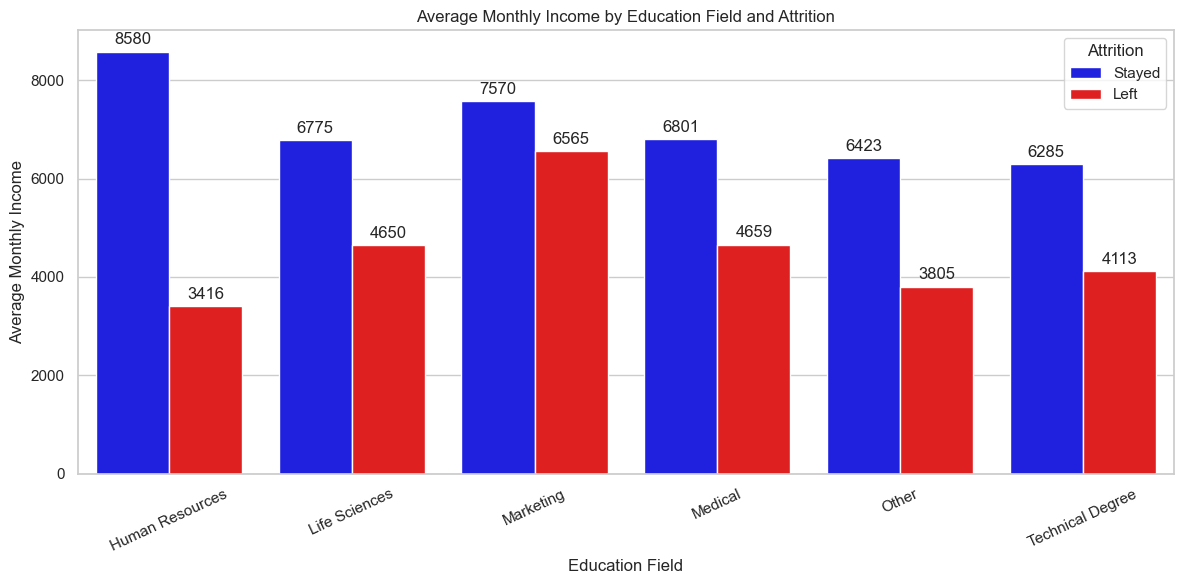

In [62]:
#plot the results
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=income_stats_all,
    x="EducationField", y="AverageMonthlyIncome", hue="Attrition",
    palette={0: "blue", 1: "red"}
)

#add data labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

#for correcting the color scheme of the legend box
handles, labels = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles=handles, labels=["Stayed", "Left"], title="Attrition")

plt.title("Average Monthly Income by Education Field and Attrition")
plt.ylabel("Average Monthly Income")
plt.xlabel("Education Field")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

- **Human Resources** employees who were *attrited* had a **86%** difference in Monthly Income compared to the employees who are still in the company. Meaning, in the case of the HR employees who were attrited, `Income` could have been a reason for their attrition.
- However in the cases of **Life Sciences**, there is a **37%** difference in Income between the attrited employees and the ones who stayed. In **Marketing**, there is only a **14%** difference in Income. In **Medical**, there is a **37%** income difference. In **Technical Degree**, there is a **41%** income difference and lastly, in **Other**, there is a **51%** income difference between the attrited employees and the ones who are still in the company.
- Although, most of the different education field's attrited employees had a large gap in income between the employees that stayed in the company, Human Resources took the largest blow with a whopping 86% income difference. An obvious drive to why they could have left the company.

## Environment Satisfaction vs Attrition

- The Environment Satisfaction column consists of 4 category scores: 1, 2, 3, 4. With 4 as the highest score (Very Satisfied) and 1 as the lowest score (Unsatisfied).

In [63]:
att["EnvironmentSatisfaction"].shape

(1470,)

- Based on the data of our shape function, there are 1,470 employees who gave their Environment Satisfaction score.
- Let's create a summarization by Attrition for this analysis. 

In [64]:
#group by the summarization of the Environment Satisfaction scores by Attrition:
att.groupby("Attrition", observed=True)["EnvironmentSatisfaction"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
1,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0


- **Lower Satisfaction Linked to Attrition**: Employees who left had alower average environment satisfaction score (2.46) compared to those who stayed (2.77).
- **Wider Spread**: The standard deviation is higher for attrited employees (1.17), suggesting greater variablility on how satisfied they are with the environment.
- **Same Median**: Both groups have a median of 3.0, but the 25th percentile for those who left is lower (1.0), indicating more employees rated their environment poorly.

With our data results, let's visualize a pie chart for the whole employee environment satisfaction rating.

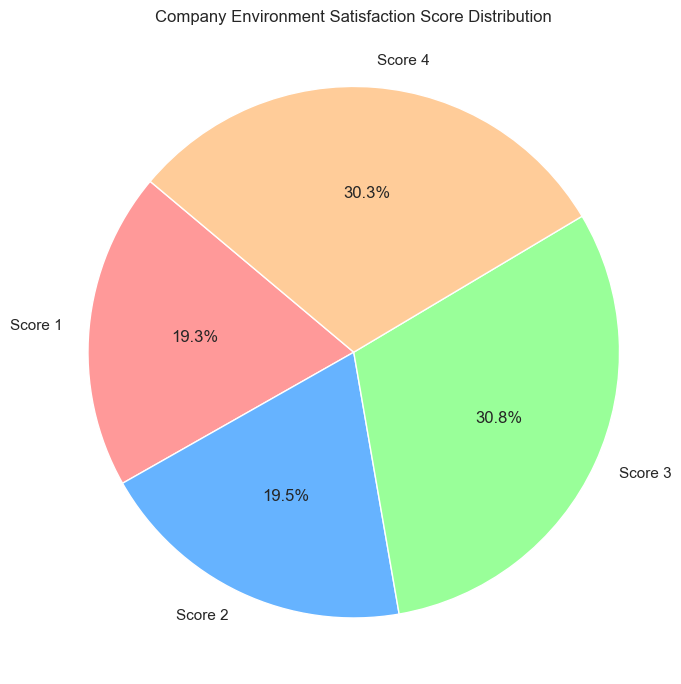

In [65]:
#count freq of each environment satisfaction score
env_counts = att["EnvironmentSatisfaction"].value_counts().sort_index()

#define labels
labels = [f"Score {int(score)}" for score in env_counts.index]

#define colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"] #for scores 1-4

#plot
plt.figure(figsize=(7, 7))
plt.pie(env_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Company Environment Satisfaction Score Distribution")
plt.axis("equal") #ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

- Majority of the employees had an Environment Satisfaction score of 3 (30.8%), followed by a score of 4 (30.3%), then score of 2 (19.5%) and lastly a score of 1 (19.3%).
- Over 61% of employees rated their environment satisfaction as 3 or 4, indicating that most employees feel moderately to highly satisfied. However, nearly 39% rated it as 1 or 2, suggesting room for improvement in workplace conditions.

The company have 1,470 employees in total, let's create a countplot to visualize the amount of employees who rated in each Satisfaction score.

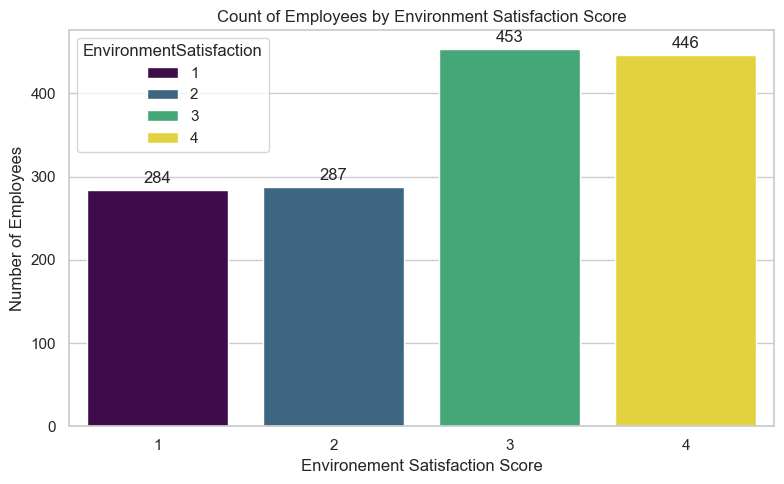

In [66]:
#count of each env satisfaction score
env_counts = att["EnvironmentSatisfaction"].value_counts().sort_index()

#plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=env_counts.index, y=env_counts.values, hue=env_counts.index, palette="viridis")

#labels and title
plt.title("Count of Employees by Environment Satisfaction Score")
plt.xlabel("Environement Satisfaction Score")
plt.ylabel("Number of Employees")

#data labels
for i, val in enumerate(env_counts.values):
    plt.text(i, val + 5, str(val), ha="center", va="bottom")

plt.tight_layout()
plt.show()

- 453 employees had a score of 3, 446 had a score of 4, 287 had a score of 2 and 284 employees had a score of 1.
- Now let's break this down further by Attrition to see if dissatisfied employees are leaving more.

By breaking these data down by Attrition, this will help us see if there's a link between low environment satisfaction and employee attrition.

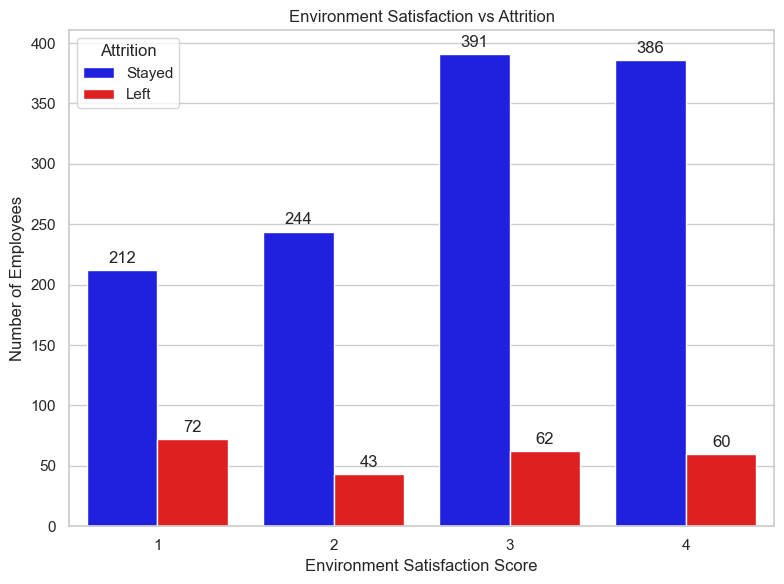

In [67]:
#group and count
env_sat_counts = (
    att.groupby(["EnvironmentSatisfaction", "Attrition"], observed=False)
    .size()
    .reset_index(name="Count")
)

#plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    data=env_sat_counts,
    x="EnvironmentSatisfaction", y="Count", hue="Attrition",
    palette={0: "blue", 1: "red"}
)

#labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

#for correcting the color scheme of the legend box
handles, labels = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles=handles, labels=["Stayed", "Left"], title="Attrition")

plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Environment Satisfaction Score")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

**Employee Environment Satisfaction Score Distribution per Attrition Status:**
- Score of 1: Employees who Stayed - 212, Attrited Employees - 72.
- Score of 2: Employees who Stayed - 244, Attrited Employees - 43.
- Score of 3: Employees who Stayed - 391, Attrited Employees - 61.
- Score of 4: Employees who Stayed - 386, Attrited Employees - 60.

- **Employees with the lowest satisfaction (Score = 1) have the highest attrition rate relative to their group**:
  - 25% of employees who had an `Environment Satisfaction` of 1 left the company.
- As satisfaction increases, `attrition slightly decreases`, but the drop is not that dramatic.

Low environment satisfaction (score of 1) appears to correlate with a higher likelihood of leaving the company. However, attrition is present across all satisfaction levels, suggesting other factors also play significant roles. Now let's get to the Percentages.

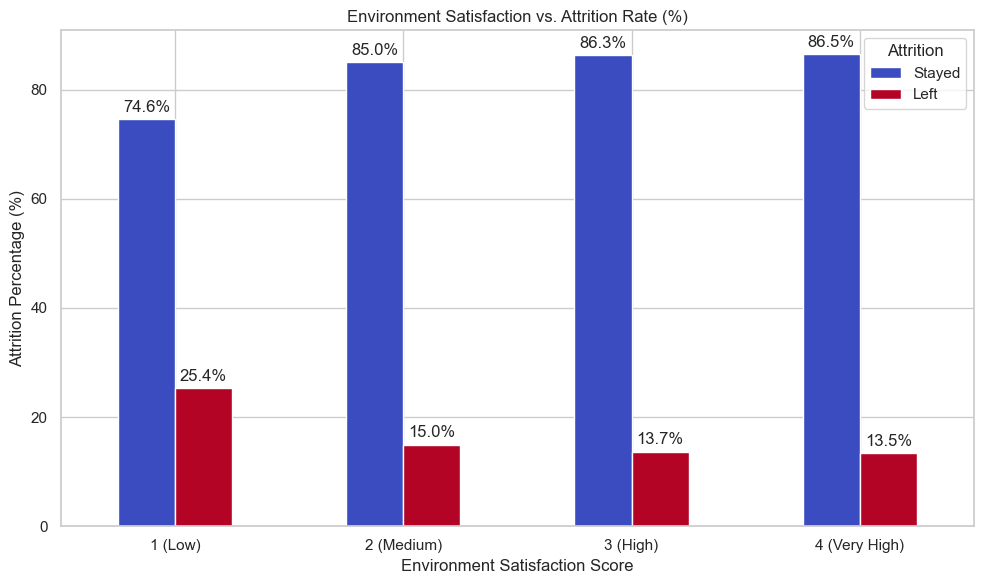

In [68]:
es_ct = pd.crosstab(att["EnvironmentSatisfaction"], att["Attrition"], normalize='index') * 100
ax = es_ct.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")


# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Aesthetics
plt.title("Environment Satisfaction vs. Attrition Rate (%)")
plt.ylabel("Attrition Percentage (%)")
plt.xlabel("Environment Satisfaction Score")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.xticks(rotation=0, ticks=[0, 1, 2, 3], labels=["1 (Low)", "2 (Medium)", "3 (High)", "4 (Very High)"])
plt.tight_layout()
plt.show()

- Employees with an **Environment Satisfaction score of 1** had the highest attrition percentages at 25.4%, very much standing out from the rest.
- Although higher satisfaction scores still had some attrition, the stark difference at score 1 indicates that **low satisfaction with the work environment is a strong potential driver of employee attrition.**

## Work Life Balance vs Attrition

- The Work Life Balance column consists of `ordinal values`.
- These categorical values range from 1 to 4 with 1 as `Bad`, 2 as `Good`, 3 as `Better` and 4 as `Best`.
- Let's start this analysis by summarizing the Work Life Balance column per Attrition.

In [69]:
att.groupby("Attrition", observed=False)["WorkLifeBalance"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.781022,0.681907,1.0,2.0,3.0,3.0,4.0
1,237.0,2.658228,0.816453,1.0,2.0,3.0,3.0,4.0


- **Employees who stayed** had an average Work-Life Balance score of `2.78`.
- **Employees who left** had a slightly lower average score of `2.66`.

Though the difference is not drastic, this suggest that **employees who were attrited tend to have a slightly poorer work-life balance**. This may not be a big driving factor for attrition alone but could also indicate as a contributing factor, especially when combined with variables such as income, job satisfaction and environment.

- The higher standard deviation among those who were attrited shows more fluctuation. Likely that more of them experienced **lower work-life balance**.

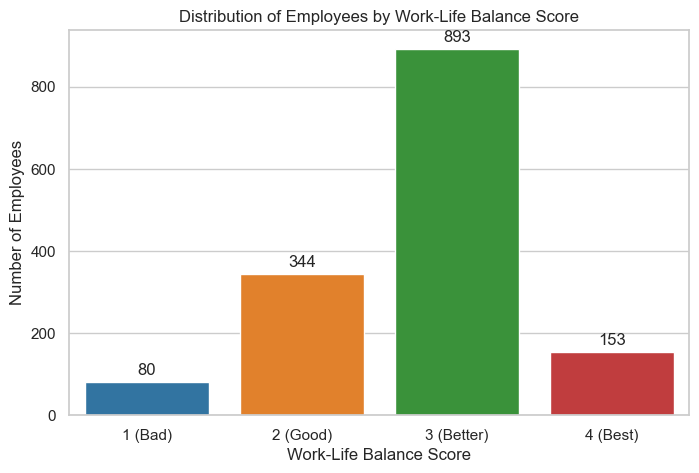

In [70]:
sns.set(style="whitegrid")

#plot
plt.figure(figsize=(8, 5))
count_plot = sns.countplot(data=att, x="WorkLifeBalance", hue="WorkLifeBalance", legend=False, palette="tab10")
plt.title("Distribution of Employees by Work-Life Balance Score")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Number of Employees")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1 (Bad)", "2 (Good)", "3 (Better)", "4 (Best)"])

#data labels
for container in count_plot.containers:
    count_plot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    
plt.tight_layout
plt.show()

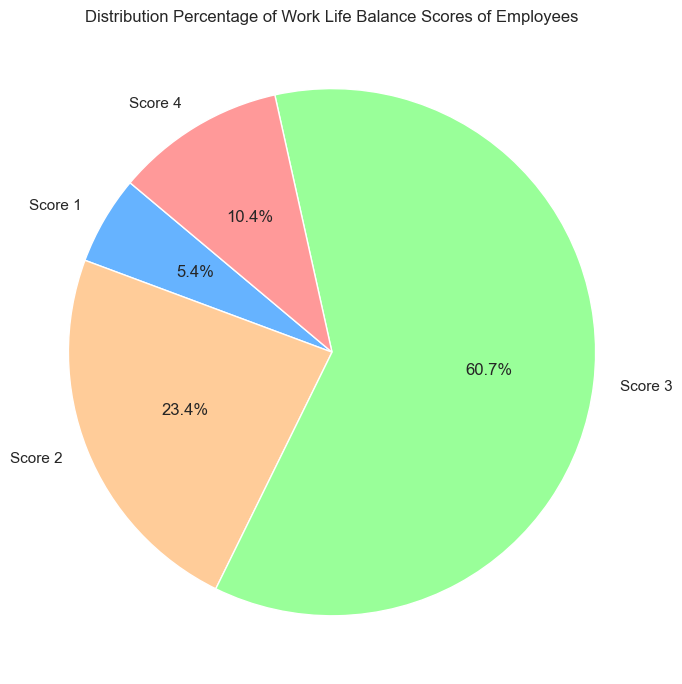

In [71]:
#pie chart (percentage distribution)

#count freq of each environment satisfaction score
wlb_counts = att["WorkLifeBalance"].value_counts().sort_index()

#define labels
labels = [f"Score {int(score)}" for score in wlb_counts.index]

#define colors
colors = ["#66b3ff", "#ffcc99", "#99ff99", "#ff9999"] #for scores 1-4

#plot
plt.figure(figsize=(7, 7))
plt.pie(wlb_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Distribution Percentage of Work Life Balance Scores of Employees")
plt.axis("equal") #ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

- As per our results, `60% (893)` employees had a work-life balance **score of 3**, followed by `23.4% (344)` with a **score of 2**, then `10.4% (153)` employees having a **score of 4** and lastly `5.4% (80)` employees having a **score of 1**.
- A potential trend is visible: **most of the employees in the company have a work-life balance average score of 3** which indicates better work-life balance experience.
- This suggests that while extreme dissatisfaction is rare, there is still considerable room to improve toward a more optimal work-life integration for the entire workforce.
- This result is hardly enough to feed our curiousity whether Work-Life Balance affects the attrition of employees, let's try getting the work-life balance score of employees by Attrition.

In [72]:
#count of Work-Life Balance scores by Attrition
wlb_counts = att.groupby(["WorkLifeBalance", "Attrition"]).size().reset_index(name="Count")
wlb_counts

,WorkLifeBalance,Attrition,Count
0,1,0,55
1,1,1,25
2,2,0,286
3,2,1,58
4,3,0,766
5,3,1,127
6,4,0,126
7,4,1,27


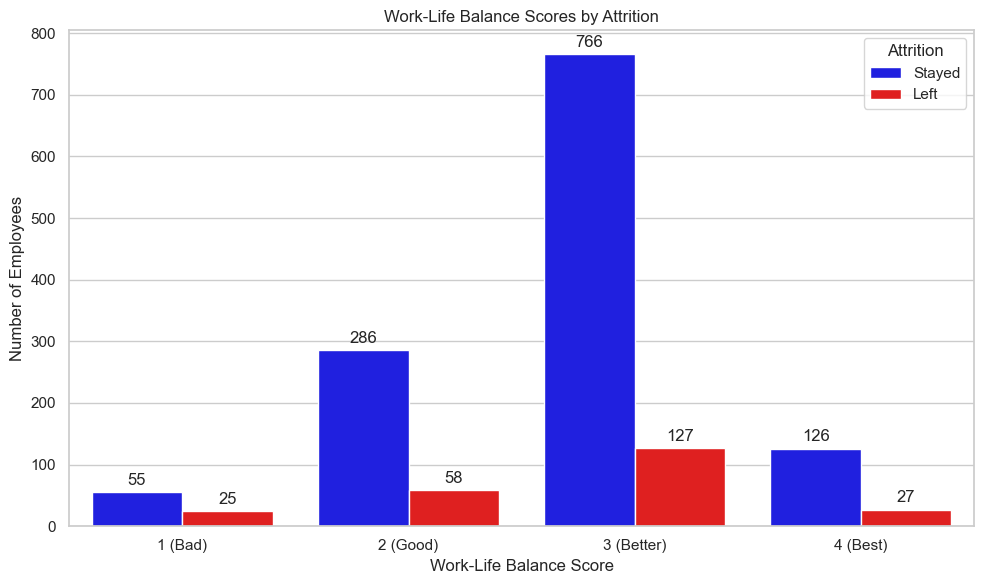

In [73]:
#plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=wlb_counts, x="WorkLifeBalance", y="Count", hue="Attrition", palette={0: "blue", 1: "red"})

#data labels
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

#for correcting the color scheme of the legend box
handles, labels = bar_plot.get_legend_handles_labels()
bar_plot.legend(handles=handles, labels=["Stayed", "Left"], title="Attrition")

plt.title("Work-Life Balance Scores by Attrition")
plt.xlabel("Work-Life Balance Score")
plt.ylabel("Number of Employees")
plt.xticks(ticks=[0, 1, 2, 3], labels=["1 (Bad)", "2 (Good)", "3 (Better)", "4 (Best)"]) #for better x ticks visualization instead of 1, we get 1 (bad)
plt.tight_layout()
plt.show()

Despite being a positive Work-Life Balance score, **the score of 3 (Better) was still the most common score among the employees who have been attrited** with `127 employees` falling into this category. This suggests that:
- A score of 3, while being positive, might not be "good enough" for retention.
- Work-Life Balance alone is not a sufficient reason to stay unless it's truly exceptional (score of 4).
- Employees with lower Work-Life Balance scores (1 or 2) still left in significant numbers: **58**(Score 2) and **25**(Score 1).
- Even among those with the highest Work-Life Balance score of 4, **27** employees still left, indicating that other factors also play key roles.

However these are absolute values that we are talking about. What about the Percentages?

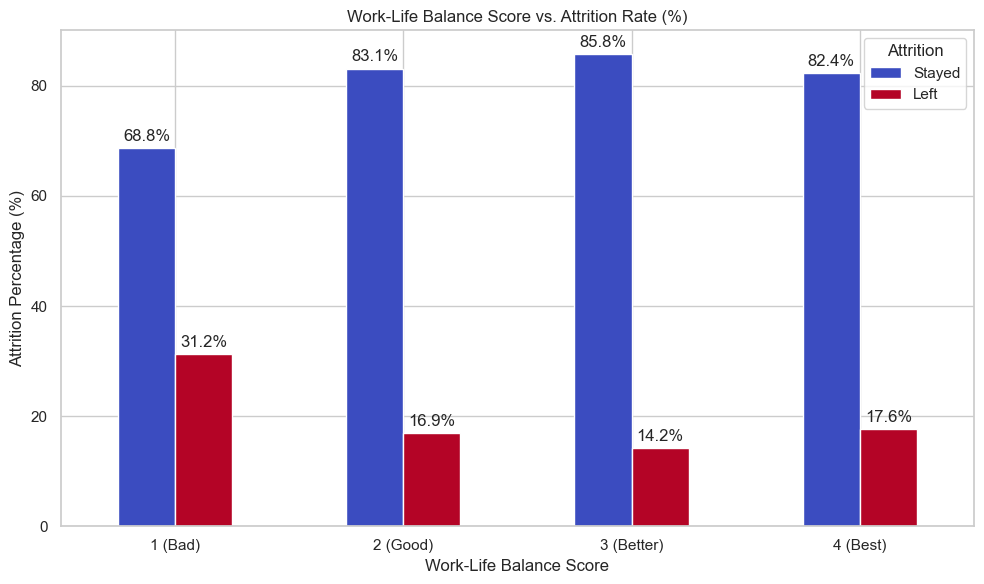

In [74]:
# Crosstab and plot
wlb_ct = pd.crosstab(att["WorkLifeBalance"], att["Attrition"], normalize='index') * 100
ax = wlb_ct.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")


# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

# Aesthetics
plt.title("Work-Life Balance Score vs. Attrition Rate (%)")
plt.ylabel("Attrition Percentage (%)")
plt.xlabel("Work-Life Balance Score")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.xticks(rotation=0, ticks=[0, 1, 2, 3], labels=["1 (Bad)", "2 (Good)", "3 (Better)", "4 (Best)"])
plt.tight_layout()
plt.show()

- Despite having the lowest volume of employees, the Score of 1 has the highest percentage of employees leaving the company with `31.2%` Attrition Percentage compared to the Score of 3 with only `14.2%` Attrition Percentage.
- While Work-Life Balance score of 3 has the highest volume of employees who left the company (127 attrited employees), it is important to consider this in context of how many employees had that score overall. With **893 total employees** scoring a 3, the `attrition rate is only 14.2%`
- In contrast, employees with a Work-Life Balance score of 1 show a much more concerning trend: **25 out of 80 employees left**, `resulting in a 31.2% attrition rate percentage`. More than double the attrition rate of those who scored a 3.

With that said, percentage attrition helped us uncover potential risk signals, score 1 indicates dissatisfaction with work-life balance and should be addressed urgently despite being fewer in number.

## Years at Company vs Attrition

- Consists of discrete values (numerical)
- Range of values start from 0 up to 40 years.
- 25% of the Attrited employees have a <= 1 year at the company.
- 50% of the Attrited employees left within 3 years.
- 75% of the Attrited employees had <= 7 years in the company. 

In [75]:
att.groupby("Attrition", observed=False)["YearsAtCompany"].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,7.369019,6.096298,0.0,3.0,6.0,10.0,37.0
1,237.0,5.130802,5.949984,0.0,1.0,3.0,7.0,40.0


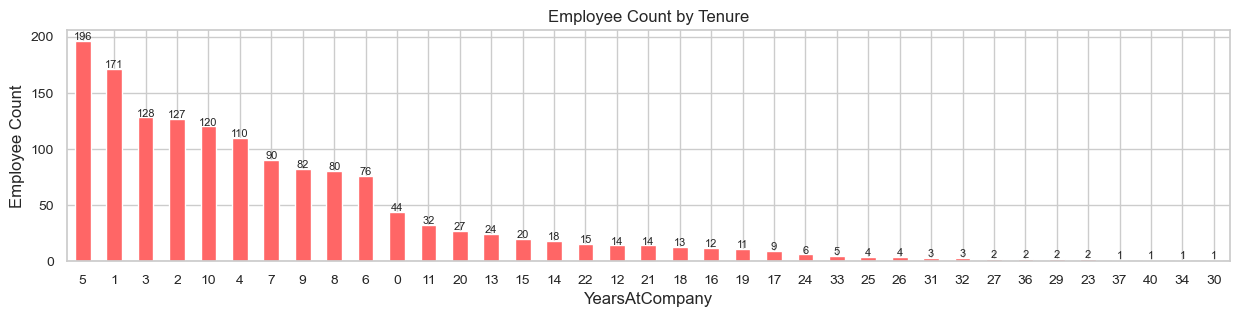

In [76]:
ax = att["YearsAtCompany"].value_counts().plot(kind="bar", figsize=(15, 3), fontsize=10, color="#ff6666")


plt.ylabel("Employee Count")
plt.title("Employee Count by Tenure")
plt.xticks(rotation=0)

#data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1, #slightly above the bar
        int(height),
        ha="center",
        fontsize=8
    )
plt.show()

- The highest concentration of employees is in the 1-5 year range:
    - 5 years: 196 employees.
    - 1 year: 171 employees.
    - 2-4 years: over 300 combined.
- A sharp drop-off in counts after 10 years.
- Long-tenured employees (25+) are rare and scattered.

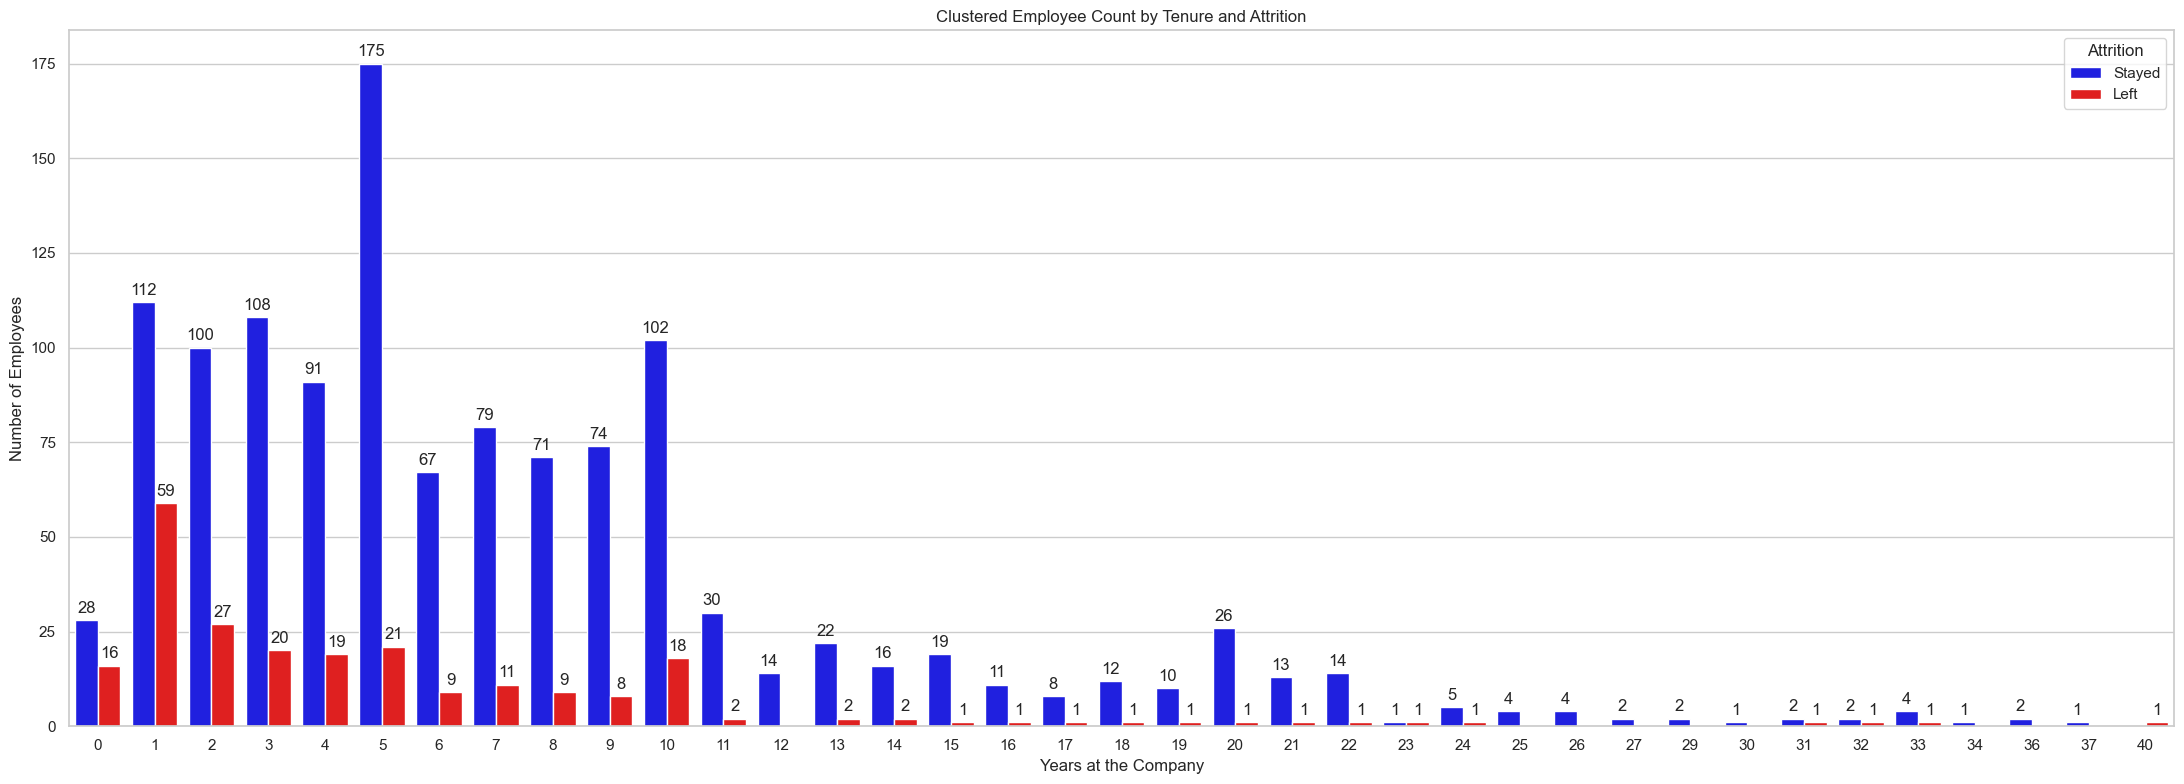

In [77]:
#plot
plt.figure(figsize=(22, 8))
count_plot = sns.countplot(data=att, x="YearsAtCompany", hue="Attrition", palette={0: "blue", 1: "red"})

#data labels
for container in count_plot.containers:
    count_plot.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

#for correcting the color scheme of the legend box
handles, labels = count_plot.get_legend_handles_labels()
count_plot.legend(handles=handles, labels=["Stayed", "Left"], title="Attrition")

plt.title("Clustered Employee Count by Tenure and Attrition")
plt.xlabel("Years at the Company")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

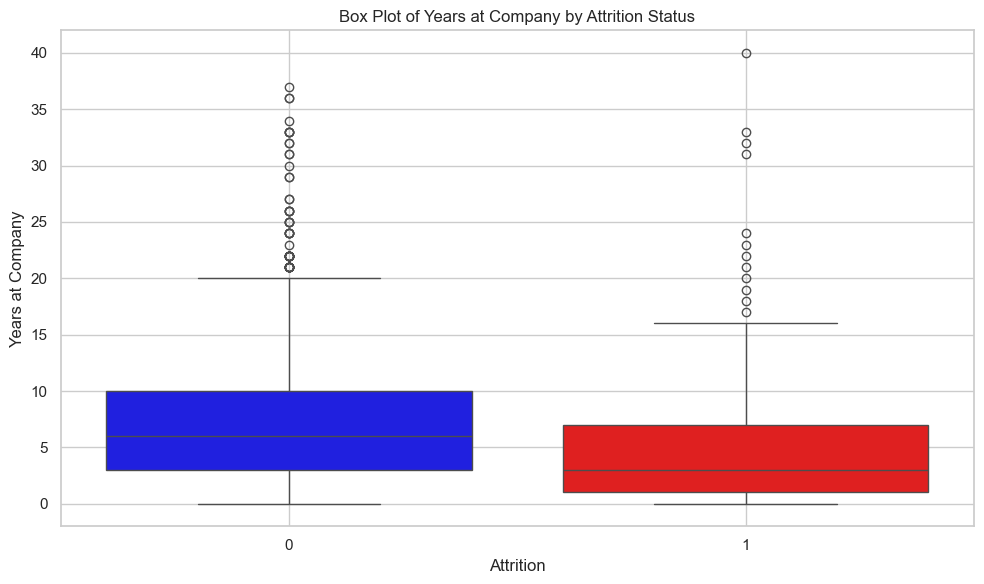

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=att, x="Attrition", y="YearsAtCompany", hue="Attrition", legend=False, palette={0: "blue", 1: "red"})

plt.title("Box Plot of Years at Company by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Years at Company")
plt.grid(True)
plt.tight_layout()
plt.show()

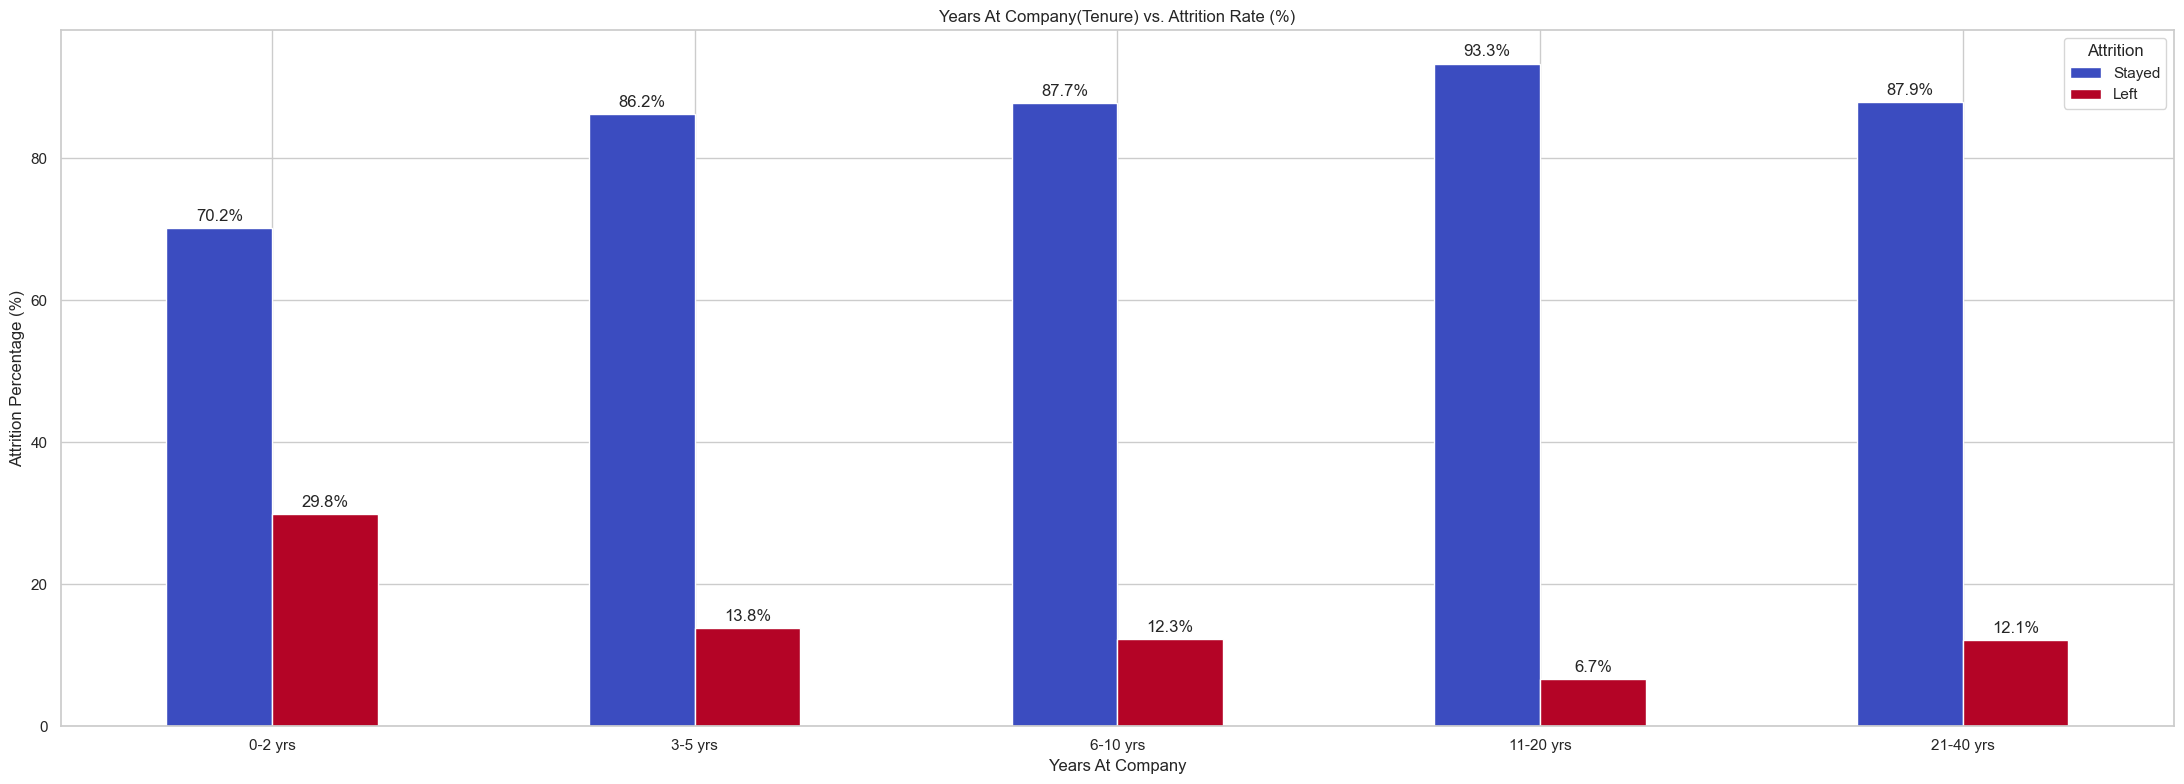

In [79]:
#create bins for Years at Company
bins = [0, 2, 5, 10, 20, 40]
labels = ["0-2 yrs", "3-5 yrs", "6-10 yrs", "11-20 yrs", "21-40 yrs"]
att["TenureGroup"] = pd.cut(att["YearsAtCompany"], bins=bins, labels=labels, right=True, include_lowest=True)

yac_ct = pd.crosstab(att["TenureGroup"], att["Attrition"], normalize='index') * 100
ax = yac_ct.plot(kind="bar", figsize=(22, 8), colormap="coolwarm")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.title("Years At Company(Tenure) vs. Attrition Rate (%)")
plt.ylabel("Attrition Percentage (%)")
plt.xlabel("Years At Company")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- **Attrition is highest among employees with <= 2 years of tenure.** This suggests potential issues with onboarding, early engagement or job fit.
- **Attrition stabilizes** for mid-level tenure groups (3-10 years), staying near 12-14%.
- **Long-term employees (11-20 yrs)** are **least likely to leave**, showing strong retention.
- a **slight rise in attrition** appears again in the **21-40 years group**, but this may involve **retirements** or other lifecycle-related exits.

## Marital Status vs Attrition

- The MaritalStatus column consists of categorical(nominal) data.
- 3 categories are present, which are: Single, Married and Divorced.

To dive deeper on our Marital Status vs Attrition analysis, let's first check the marital status distribution of the employees in the company.

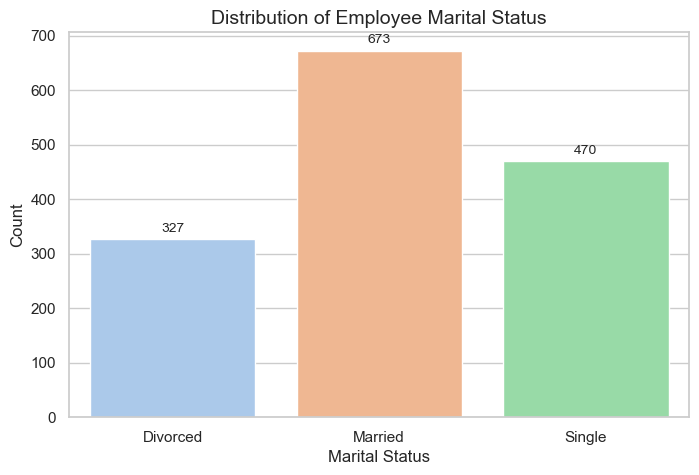

In [80]:
# create a countplot distribution of employee marital status
plt.figure(figsize=(8, 5))

# Create countplot
sns.countplot(x="MaritalStatus", data=att, hue="MaritalStatus", palette="pastel")

# Formatting
plt.title("Distribution of Employee Marital Status", fontsize=14)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)

# Add data labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10, padding=3)

plt.show()

- There are **673** employees who are `Married`, **470** who are `Single` and **327** who are `Divorced`.
- In percentage terms, **47.4%** are Married, **33.1%** are Single and **23%** are Divorced.

In [81]:
att.groupby(["MaritalStatus", "Attrition"], observed=False).size().reset_index(name="Count")

,MaritalStatus,Attrition,Count
0,Divorced,0,294
1,Divorced,1,33
2,Married,0,589
3,Married,1,84
4,Single,0,350
5,Single,1,120


Now let's make an Attrition Breakdown by Marital Status by using a normalized percentage plot.

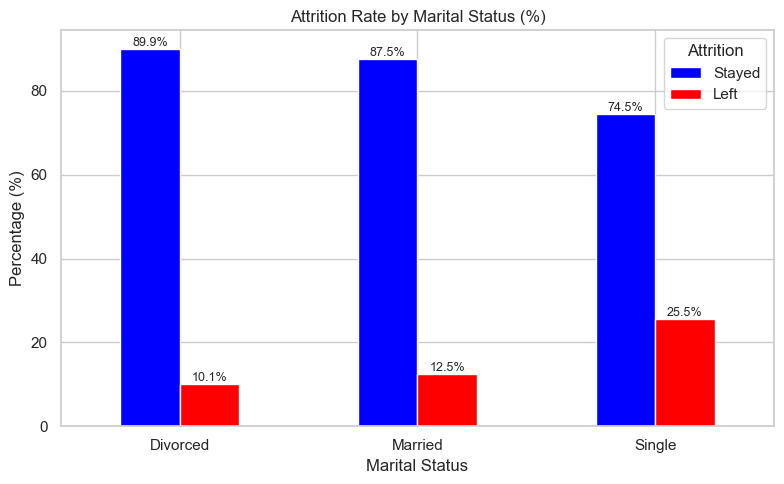

In [82]:
#crosstab with normalization byb marital status
ms_ct = pd.crosstab(att["MaritalStatus"], att["Attrition"], normalize="index")*100

#plot
ax = ms_ct.plot(kind="bar", figsize=(8, 5), color=["blue", "red"])

plt.title("Attrition Rate by Marital Status (%)")
plt.xlabel("Marital Status")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.tight_layout()

#data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", fontsize=9)
plt.show()

- `Single` employees have the highest attrition percentage with **25.5%**, over 1 in 4 Single employees left the company.
- `Married` employees have **12.5%** attrition percentage meaning about 1 in 8 married employees leave
- `Divorced` employees have the lowest attrition rate with **10.1%** being more stable.

**Single employees** are more than twice as likely to leave compared to married employees. **Divorced employees** show the lowest attrition rate, suggesting they may be more settled or reliant on job stability.

- This could reflect factors like:
    - Work-life balance struggles for younger/single employees.
    - Different career priorities or mobility.
    - Lack of strong engagement or attachment to the company.

## Department vs Attrition

In [83]:
#Total distribution of employees in each department in the company
dept_distribution = att["Department"].value_counts()
dept_distribution

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

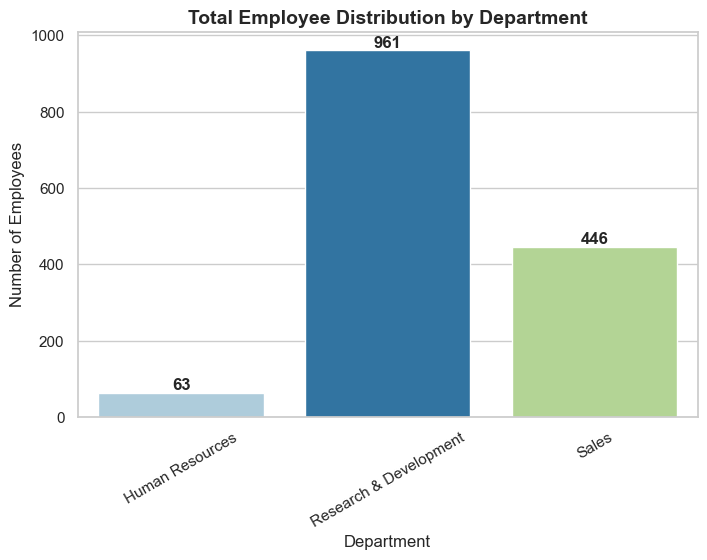

In [84]:
#visualize the results
#sample data
dept_distribution2 = {"Human Resources": 63, "Research & Development": 961, "Sales": 446}

#barplot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(dept_distribution2.keys()), y=list(dept_distribution2.values()), hue=list(dept_distribution2.keys()), palette="Paired")

#labels
for i, value in enumerate(dept_distribution2.values()):
    ax.annotate(f"{value}", xy=(i, value), ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Total Employee Distribution by Department", fontsize=14, fontweight="bold")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.xticks(rotation=30)
plt.show()

Research & Development holds the most Employees while Humans Resources have the least. Let's look at the Attrition Rates of each Department.

In [85]:
#get the percentage of attrition in each department
dept_attr_rate = pd.crosstab(att.Department,columns = att.Attrition, normalize='index') * 100
dept_attr_rate.rename(columns={0: "Stayed (%)", 1:"Left (%)"}, inplace=True)
dept_attr_rate

Attrition,Stayed (%),Left (%)
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


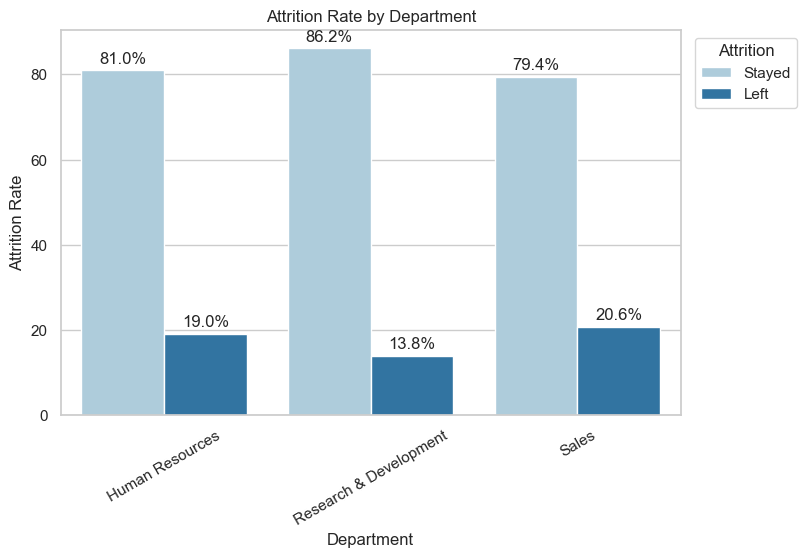

In [86]:
#visualize the results using a group stacked chart
dept_attr_rate_reset = dept_attr_rate.reset_index()
dept_attr_rate_melted = dept_attr_rate_reset.melt(id_vars="Department", var_name="Attrition", value_name="Percentage")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Department", y="Percentage", hue="Attrition", data=dept_attr_rate_melted, palette="Paired")

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f%%", padding=3)

handles, labels = ax.get_legend_handles_labels()
plt.title("Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Rate")
plt.legend(handles=handles, labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=30)
plt.show()

Sales and Human Resources departments have high Attrition Rates compared to Research & Development. Could indicate underlying issues such as high-pressure environments in Sales or HR roles may involve dealing with conflicts, burnout risks.

#### Salary vs Attrition per Department

- With our findings above, we will delve deeper by analyzing Salary between Department employees who stayed and left.

We will start by getting the average salaries of each employees in their respected Department.

In [87]:
att["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [88]:
salary_dept_attrition = att.groupby(["Department", "Attrition"], observed=True)["MonthlyIncome"].mean().unstack()

<Figure size 800x500 with 0 Axes>

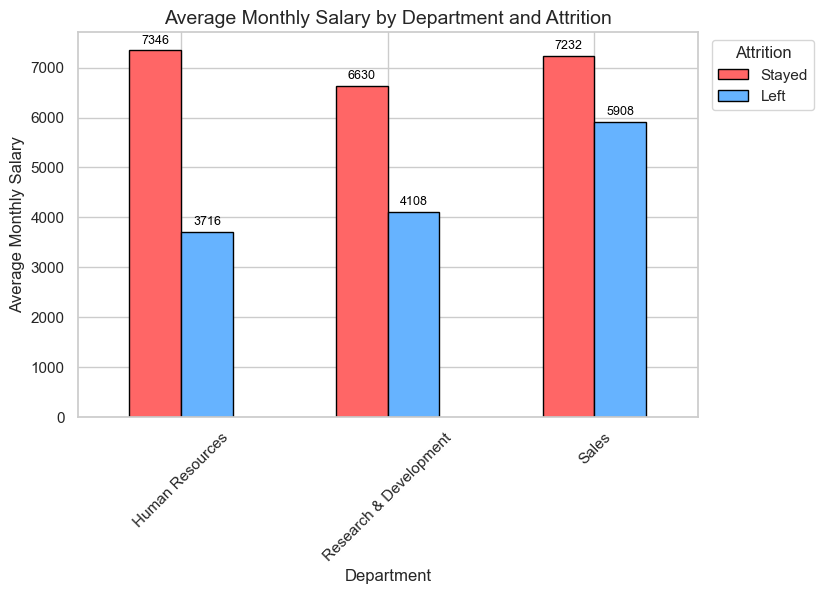

In [89]:
#visualize the results
plt.figure(figsize=(8, 5))
colors = ["#ff6666", "#66b3ff"]
sal_dept = salary_dept_attrition.plot(kind="bar", figsize=(8, 5), color=colors, edgecolor="black")
for container in sal_dept.containers:
    sal_dept.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=3, color="black")
plt.title("Average Monthly Salary by Department and Attrition", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Average Monthly Salary", fontsize=12)
plt.xticks(rotation=45)
plt.legend(labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

Employees who left the company in each Department had lower income salaries compared to the ones staying. However, the Sales Department had a different case as the salaries were not much of a big difference between the employees who stayed and the employees who left. Sales employees had an income difference of 18% between the ones who stayed and the ones who left, compared to HR and R&D which had a 49% and 38% income difference. 

#### Job Satisfaction vs Department and Attrition

- Since salary was not a major factor to all departments in the company, we will try looking at the Job Satisfaction of employees.
- Job Satisfaction can also be a leading motive to why Employees leave a certain company. May it be hectic schedules, overloaded work, etc. 

In [90]:
job_sat_v2 = pd.crosstab([att.Department, att.Attrition], att.JobSatisfaction, normalize="index") * 100
job_sat_v2

JobSatisfaction                           1          2          3          4
Department             Attrition                                            
Human Resources        0          11.764706  35.294118  23.529412  29.411765
                       1          41.666667  16.666667  25.000000  16.666667
Research & Development 0          18.599034  18.115942  31.038647  32.246377
                       1          28.571429  18.045113  32.330827  21.052632
Sales                  0          17.796610  18.644068  28.248588  35.310734
                       1          25.000000  21.739130  29.347826  23.913043

This dataframe consists the percentage distribution of Job Satisfaction Ratings in every Department per Attrition with 1 as the lowest rating and 4 as the highest.

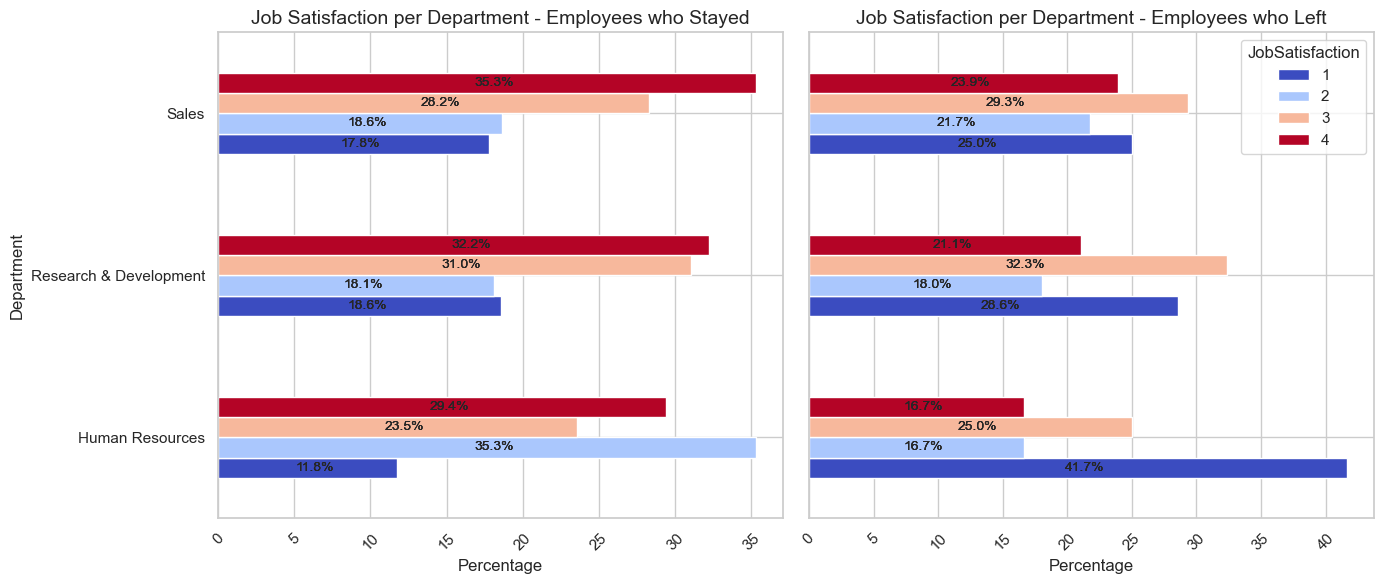

In [91]:
#now we'll visualize the results
stayed_data = job_sat_v2.xs(0, level='Attrition')
left_data = job_sat_v2.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

#employees who stayed
stayed_data.plot(kind='barh', stacked=False, ax=axes[0], colormap='coolwarm', legend=False)
axes[0].set_title("Job Satisfaction per Department - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)


#employees who left
left_data.plot(kind='barh', stacked=False, ax=axes[1], colormap='coolwarm', legend=True)
axes[1].set_title("Job Satisfaction per Department - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

def add_labels(ax):
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)
add_labels(axes[0])
add_labels(axes[1])
plt.tight_layout()
plt.show()

Employees who left the company had very low Job Satisfaction ratings in each department, especially in the HR department. However, in Sales' case, it's not as high compared to HR's results. This would indicate Job Satisfaction and Salary aren't a driving factor to why employees in the Sales department are leaving.

In [92]:
#get the mean average of Job Satisfaction per attrition and department
job_sat_dept = att.groupby(["Department", "Attrition"], observed=True)["JobSatisfaction"].mean().unstack()

<Figure size 800x500 with 0 Axes>

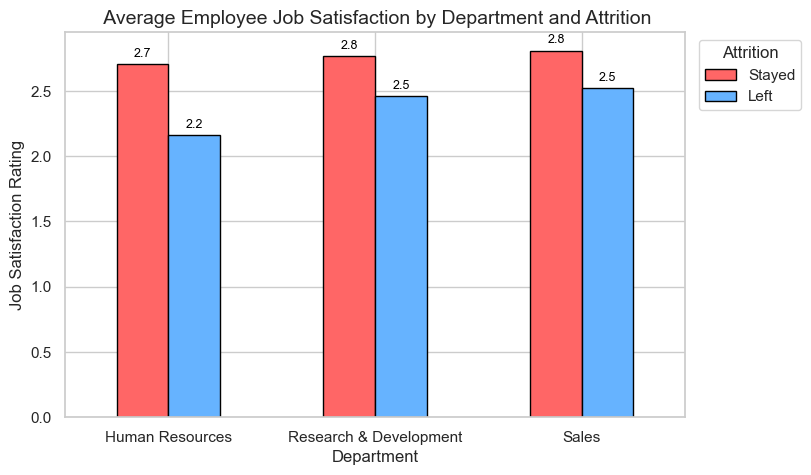

In [93]:
plt.figure(figsize=(8, 5))
colors = ["#ff6666", "#66b3ff"]
jsb = job_sat_dept.plot(kind="bar", figsize=(8, 5), color=colors, edgecolor="black")
for container in jsb.containers:
    jsb.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=3, color="black")
plt.title(" Average Employee Job Satisfaction by Department and Attrition", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Job Satisfaction Rating", fontsize=12)
plt.xticks(rotation=0)
plt.legend(labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

In this plot, we can see that both Research & Development and Sales Department had a stable satisfaction with their jobs as 2.5 for both R&D and Sales on the employees who left satisfaction levels are still borderline high compared to HR's 2.2 which is low. Let's check if Environment Satisfaction is a variable to their abrupt departure.

#### Environment Satisfaction vs Department and Attrition

- Job Satisfaction did not feed our curiousity as much as we expected. Employees from R&D and Sales who left had a Job Satisfactory rating of 2.5 at an average. We have yet to uncover why Sales had so high attrition despite favorable conditions in the Company.
- With Environment Satisfaction, maybe we'll get a better insight to why that's the case.

In [94]:
#get the percentage distribution of environment satisfactory levels in each department and attrition
ev_sat_ct = pd.crosstab([att.Department, att.Attrition], att.EnvironmentSatisfaction, normalize="index") * 100

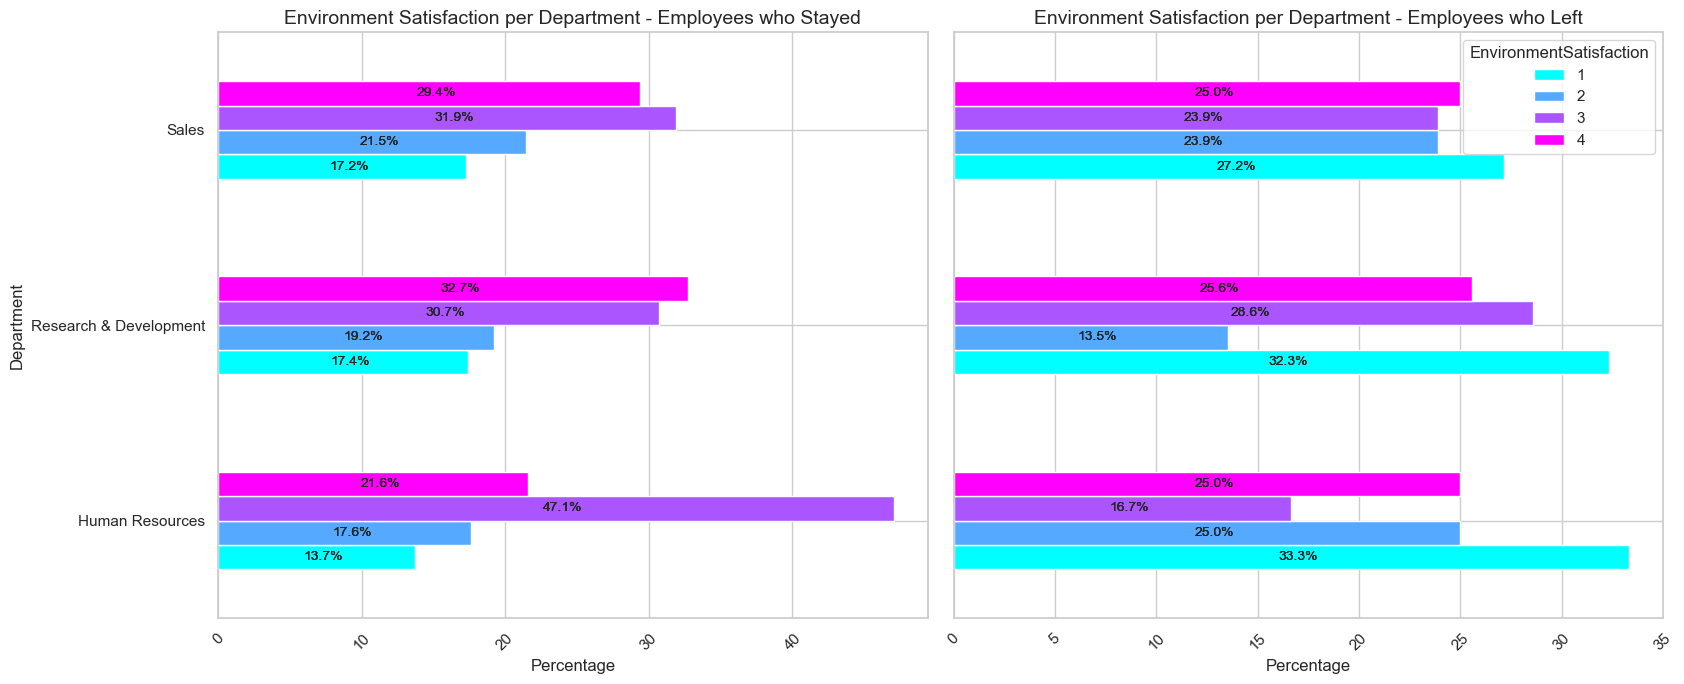

In [95]:
#now we'll visualize the results
stayed_data = ev_sat_ct.xs(0, level='Attrition')
left_data = ev_sat_ct.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), sharey=True)

#employees who stayed
stayed_data.plot(kind='barh', stacked=False, ax=axes[0], colormap='cool', legend=False)
axes[0].set_title("Environment Satisfaction per Department - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)


#employees who left
left_data.plot(kind='barh', stacked=False, ax=axes[1], colormap='cool', legend=True)
axes[1].set_title("Environment Satisfaction per Department - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

def add_labels(ax):
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)
add_labels(axes[0])
add_labels(axes[1])
plt.tight_layout()
plt.show()

In [96]:
#get the mean average of Environment Satisfaction per attrition and department
env_sat_dept = att.groupby(["Department", "Attrition"], observed=True)["EnvironmentSatisfaction"].median().unstack()

In [97]:
att.groupby(["Department", "Attrition"], observed=True)["EnvironmentSatisfaction"].value_counts().unstack()

EnvironmentSatisfaction             1    2    3    4
Department             Attrition                    
Human Resources        0            7    9   24   11
                       1            4    3    2    3
Research & Development 0          144  159  254  271
                       1           43   18   38   34
Sales                  0           61   76  113  104
                       1           25   22   22   23

<Figure size 800x500 with 0 Axes>

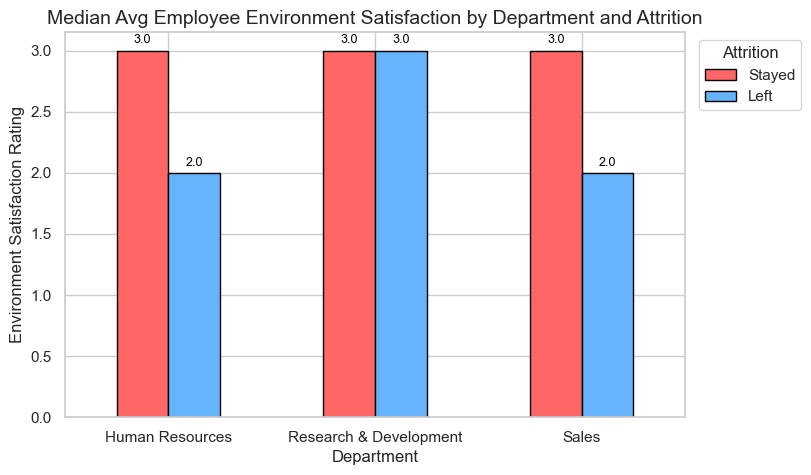

In [98]:
plt.figure(figsize=(8, 5))
colors = ["#ff6666", "#66b3ff"]
esd = env_sat_dept.plot(kind="bar", figsize=(8, 5), color=colors, edgecolor="black")
for container in esd.containers:
    esd.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=3, color="black")
plt.title("Median Avg Employee Environment Satisfaction by Department and Attrition", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Environment Satisfaction Rating", fontsize=12)
plt.xticks(rotation=0)
plt.legend(labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

You might be wondering as to why Sales was rounded down to 2.0 instead of 3 compared to R&D, it is due to the fact that R&D had more employees with a satisfactory rating of 3 (38) compared to Sales who only had 22. Plus the amount of employees who rated 2 in Sales is also 22, keeping the median low.

So far, Environmental satisfaction played a big part in HR and R&D employees leaving, however with Sales' case it's still unsolved. Let's try getting data from their Work-life balance.

#### Work-life balance vs Department and Attrition

- Work-life balance can also be a factor in the attrition of employees as it divides an individual's time for work and personal activities.
- The dataset also features a Work-life balance column with values ranging from 1 to 4 with 1 as bad work-life balance and 4 as best.

In [99]:
wlb_ct = pd.crosstab([att.Department, att.Attrition], att.WorkLifeBalance, normalize="index") * 100
wlb_ct = wlb_ct.reindex(columns=[1, 2, 3, 4], fill_value=0)

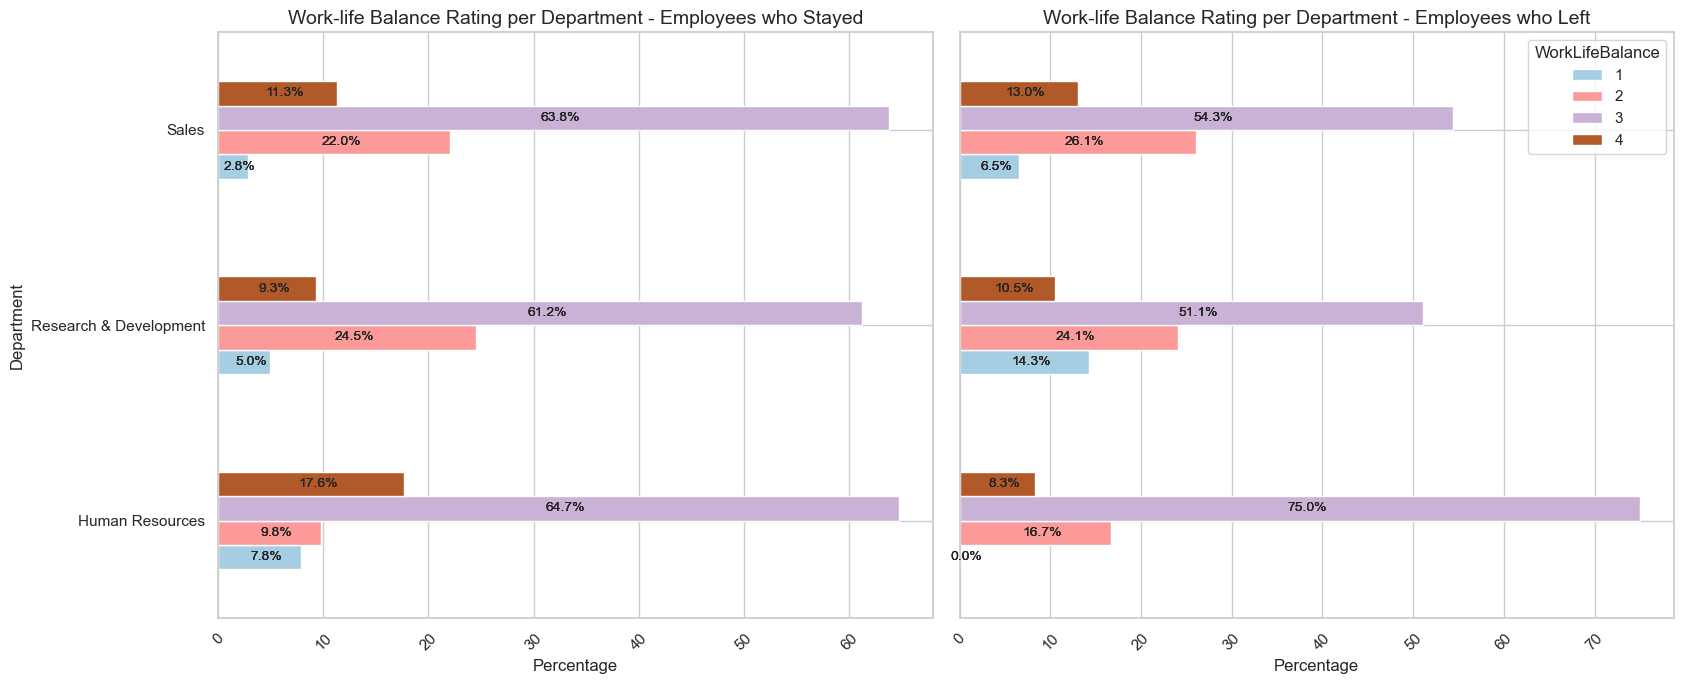

In [100]:
#now we'll visualize the results
stayed_data = wlb_ct.xs(0, level='Attrition')
left_data = wlb_ct.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), sharey=True)

#employees who stayed
stayed_data.plot(kind='barh', stacked=False, ax=axes[0], colormap='Paired', legend=False)
axes[0].set_title("Work-life Balance Rating per Department - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)


#employees who left
left_data.plot(kind='barh', stacked=False, ax=axes[1], colormap='Paired', legend=True)
axes[1].set_title("Work-life Balance Rating per Department - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

def add_labels(ax):
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)
add_labels(axes[0])
add_labels(axes[1])
plt.tight_layout()
plt.show()

It appears that there are 0 employees that have a rating of 1 in the HR Department with an Attrition of Yes. Let's double check if there are no errors.

In [101]:
att.groupby(["Department", "Attrition"], observed=True)["WorkLifeBalance"].value_counts().unstack()

WorkLifeBalance                      1      2      3     4
Department             Attrition                          
Human Resources        0           4.0    5.0   33.0   9.0
                       1           NaN    2.0    9.0   1.0
Research & Development 0          41.0  203.0  507.0  77.0
                       1          19.0   32.0   68.0  14.0
Sales                  0          10.0   78.0  226.0  40.0
                       1           6.0   24.0   50.0  12.0

We have NaN values in the HR department. Let's check the dataset to confirm it.

In [102]:
att["WorkLifeBalance"].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [103]:
att[(att["Department"] == "Human Resources") & (att["WorkLifeBalance"] == 1)]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeGroup,IncomeGroup,TenureGroup
139,30,0,Human Resources,9,3,Human Resources,3,4,Married,6347,0,1,11,30-34,Low,11-20 yrs
551,39,0,Human Resources,3,3,Human Resources,3,2,Married,6389,9,1,8,35-39,Low,6-10 yrs
613,34,0,Human Resources,3,2,Human Resources,3,4,Married,3737,0,1,3,30-34,Low,3-5 yrs
835,35,0,Human Resources,8,4,Technical Degree,3,3,Single,4323,1,1,5,35-39,Low,3-5 yrs


In [104]:
att[(att["Department"] == "Human Resources") & 
    (att["WorkLifeBalance"] == 1) & 
    (att["Attrition"] == 1)]

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,AgeGroup,IncomeGroup,TenureGroup


Only employees who stayed in the company in the HR Department are the ones who reported to have a rating of 1 in the Work-life Balance survey.

In [105]:
wlb_gp = att.groupby(["Department", "Attrition"], observed=True)["WorkLifeBalance"].mean().unstack()

<Figure size 800x500 with 0 Axes>

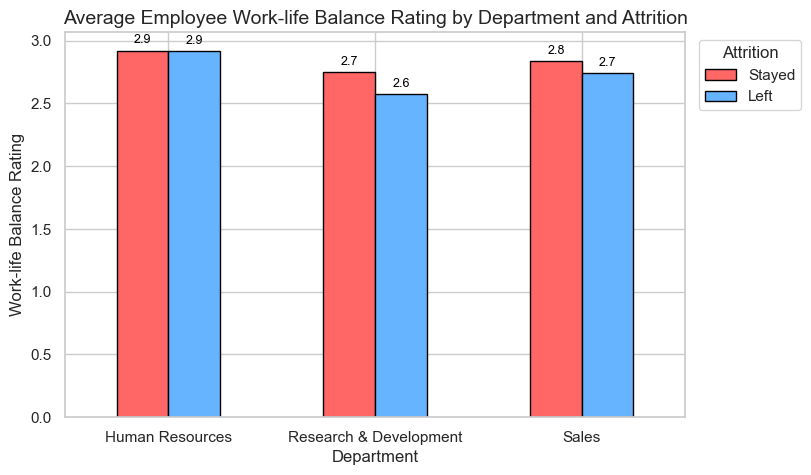

In [106]:
plt.figure(figsize=(8, 5))
colors = ["#ff6666", "#66b3ff"]
wlb = wlb_gp.plot(kind="bar", figsize=(8, 5), color=colors, edgecolor="black")
for container in wlb.containers:
    wlb.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=3, color="black")
plt.title("Average Employee Work-life Balance Rating by Department and Attrition", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Work-life Balance Rating", fontsize=12)
plt.xticks(rotation=0)
plt.legend(labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

These preview plots do not explain why Sales Department have high Attrition Rates compared to Human Resources which have more unsatisfied employees in terms of average salary, job satisfaction and environment satisfaction.

#### Education vs Department and Attrition

- Let's see Education status of these employees who left the company.
- Our dataset has an Education column with a range of 1-5 with 1 as `Below College`, 2 as `College`, 3 as `Bachelor`, 4 as `Masters` and 5 as `Doctor`.

In [107]:
educ_ct = pd.crosstab([att.Department, att.Attrition], att.Education, normalize="index") * 100

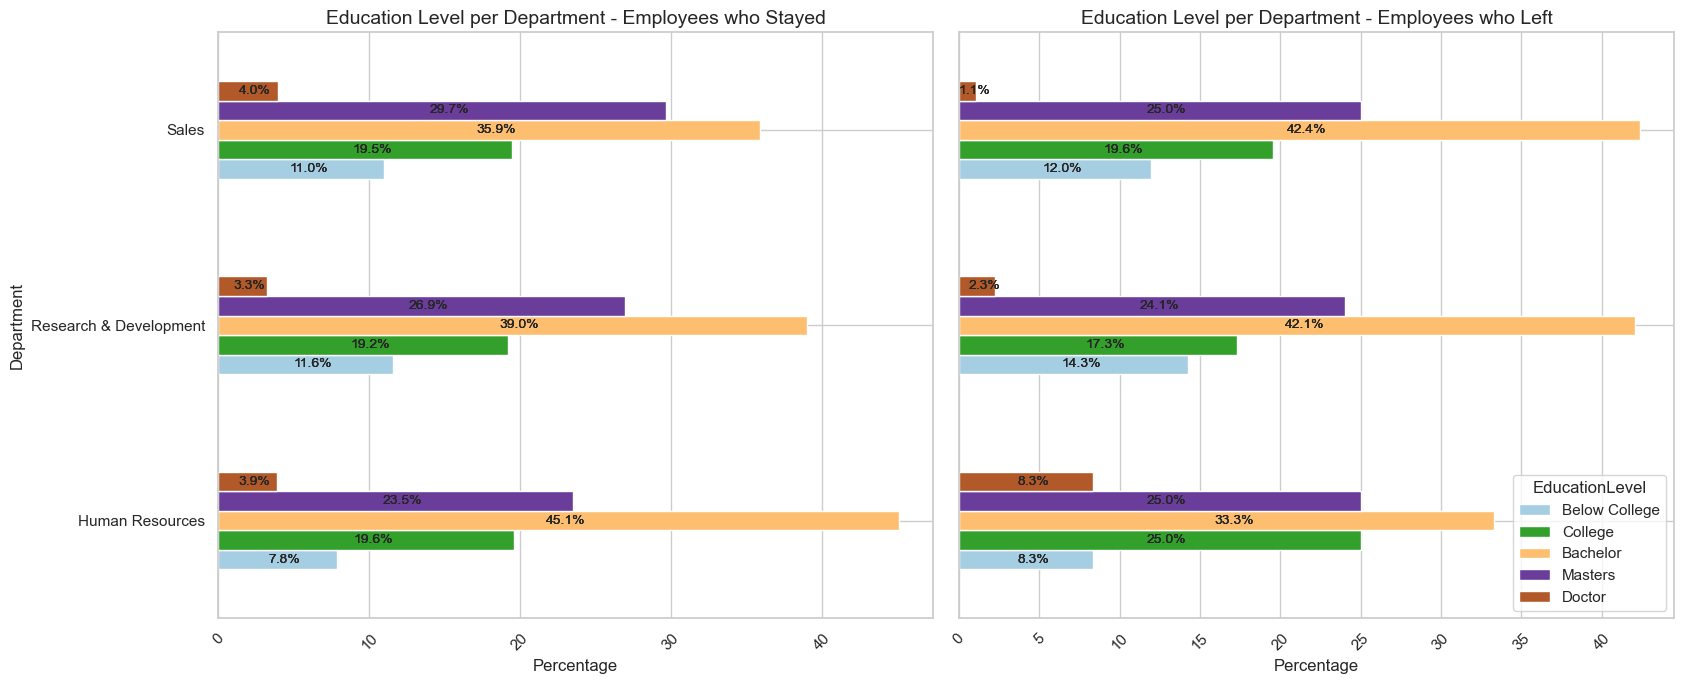

In [108]:
#now we'll visualize the results
bins = [1, 2, 3, 4, 5, 6] 
labels = ["Below College", "College", "Bachelor", "Masters", "Doctor"]

att["EducationLevel"] = pd.cut(att["Education"], bins=bins, labels=labels, right=False)
educ_ct = pd.crosstab([att.Department, att.Attrition], att.EducationLevel, normalize="index") * 100

stayed_data = educ_ct.xs(0, level='Attrition')
left_data = educ_ct.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), sharey=True)

#employees who stayed
stayed_data.plot(kind='barh', stacked=False, ax=axes[0], colormap='Paired', legend=False)
axes[0].set_title("Education Level per Department - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)


#employees who left
left_data.plot(kind='barh', stacked=False, ax=axes[1], colormap='Paired', legend=True)
axes[1].set_title("Education Level per Department - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

def add_labels(ax):
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)
add_labels(axes[0])
add_labels(axes[1])
plt.tight_layout()
plt.show()

Most employees who left the company were bachelor's degree holder. Could indicate that since they have degrees they can find better opportunities elsewhere.

#### Years Working at the Company vs Department and Attrition

- let's check the distribution of years where the employee has been working in the company for.
- This could also give us an insight to why they left.

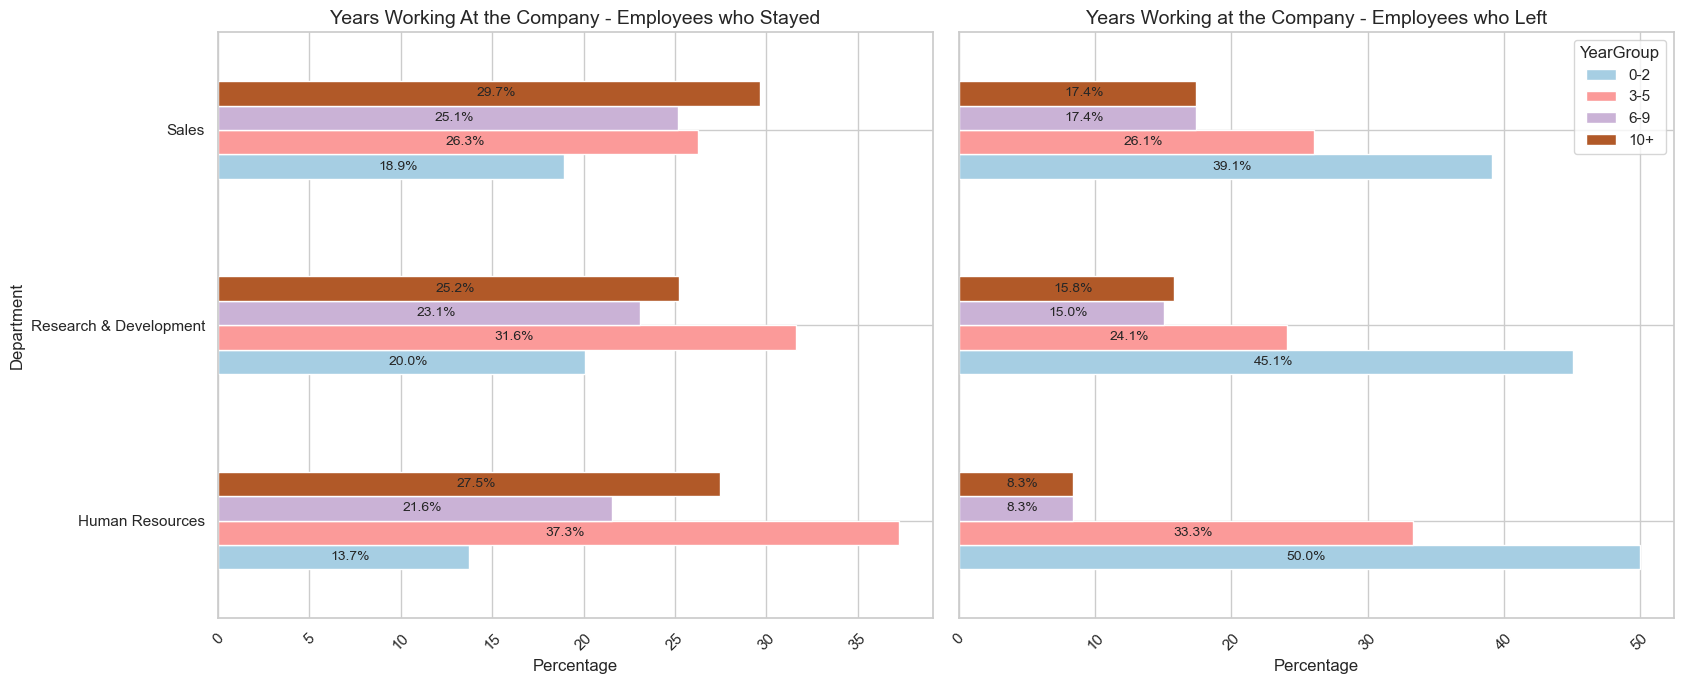

In [109]:
bins = [0, 3, 6, 10, 41] 
labels = ["0-2", "3-5", "6-9", "10+"]

att["YearGroup"] = pd.cut(att["YearsAtCompany"], bins=bins, labels=labels, right=False)
year_gp_ct = pd.crosstab([att.Department, att.Attrition], att.YearGroup, normalize="index") * 100

stayed_data = year_gp_ct.xs(0, level='Attrition')
left_data = year_gp_ct.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), sharey=True)

stayed_data.plot(kind="barh", stacked=False, ax=axes[0], colormap="Paired", legend=False)
axes[0].set_title("Years Working At the Company - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

left_data.plot(kind="barh", stacked=False, ax=axes[1], colormap="Paired", legend=True)
axes[1].set_title("Years Working at the Company - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

# Function to add labels
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)

add_labels(axes[0])
add_labels(axes[1])

plt.tight_layout()
plt.show()

Most of the employees who left the company were did not last that long in the company compared to other employees who stayed.

In [110]:
years_at_comp = att.groupby(["Department", "Attrition"], observed=True)["YearsAtCompany"].mean().unstack()

<Figure size 800x500 with 0 Axes>

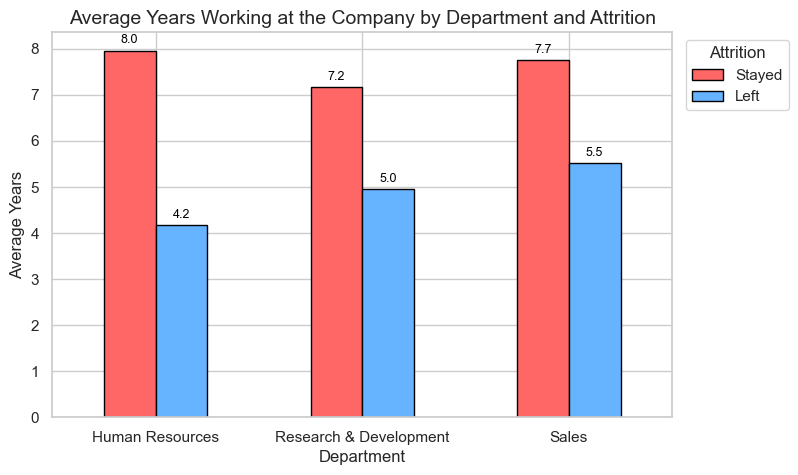

In [111]:
plt.figure(figsize=(8, 5))
colors = ["#ff6666", "#66b3ff"]
yrs = years_at_comp.plot(kind="bar", figsize=(8, 5), color=colors, edgecolor="black")
for container in yrs.containers:
    yrs.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9, padding=3, color="black")
plt.title("Average Years Working at the Company by Department and Attrition", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Average Years", fontsize=12)
plt.xticks(rotation=0)
plt.legend(labels=["Stayed", "Left"], title="Attrition", loc="upper right", bbox_to_anchor=(1.2, 1))
plt.show()

This graph shows the average years of working in the company for employees who stayed and left. most of the HR employees leave the company after 4.2 years, 5.0 for the Research & Development employees and 5.5 for the Sales employees. 

#### Age Distribution vs Department and Attrition

- For the final part of our Department vs Attrition section, we will analyze the Age Destribution of employees who left and stayed in each Department.
- With the collection of data above, we can conclude with this final output.

In [112]:
age_ct = pd.crosstab([att.Department, att.Attrition], att.Age, normalize="index") * 100

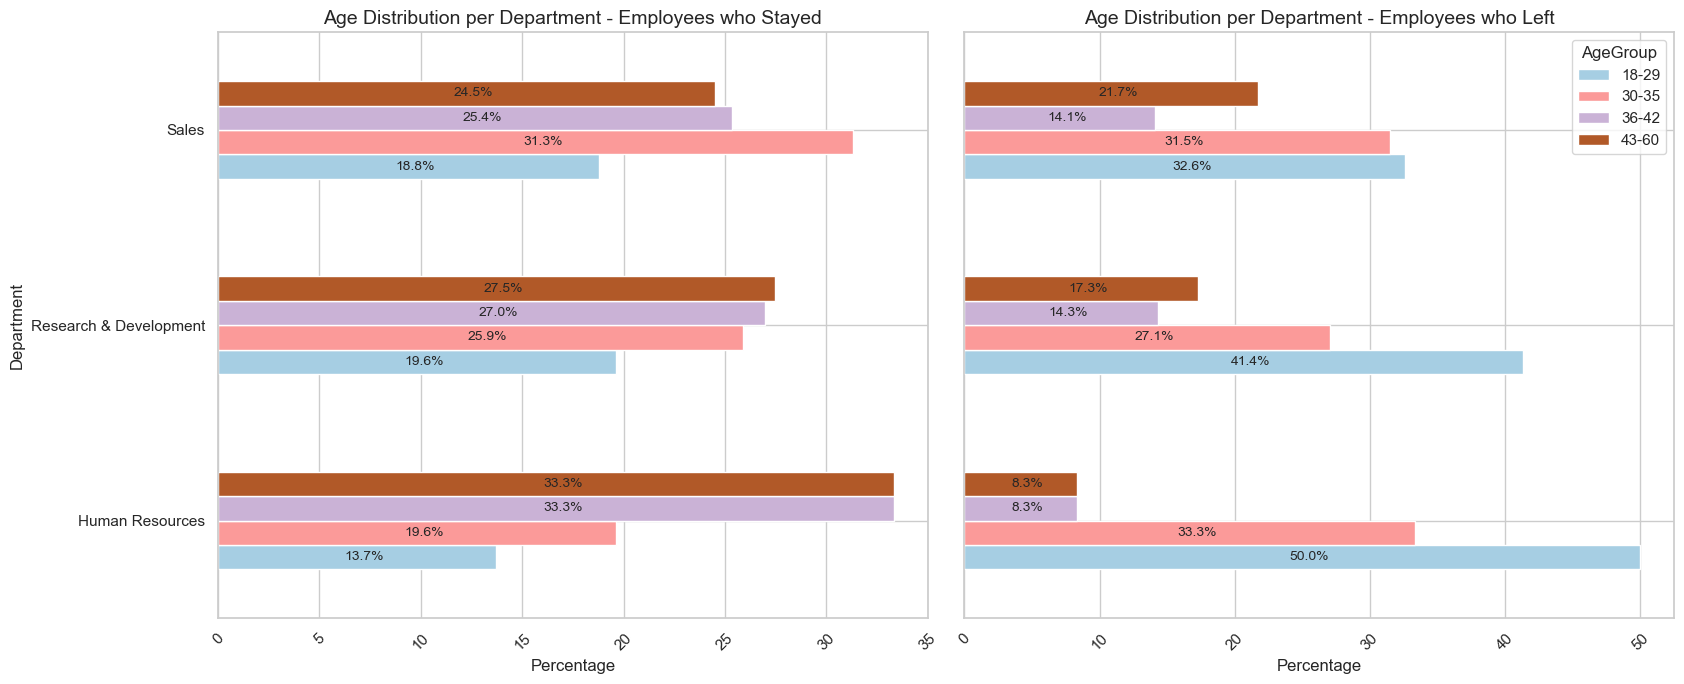

In [113]:
bins = [18, 30, 36, 43, 60]  
labels = ["18-29", "30-35", "36-42", "43-60"]

att["AgeGroup"] = pd.cut(att["Age"], bins=bins, labels=labels, right=False)
age_gp_ct = pd.crosstab([att.Department, att.Attrition], att.AgeGroup, normalize="index") * 100

stayed_data = age_gp_ct.xs(0, level='Attrition')
left_data = age_gp_ct.xs(1, level='Attrition')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), sharey=True)

stayed_data.plot(kind="barh", stacked=False, ax=axes[0], colormap="Paired", legend=False)
axes[0].set_title("Age Distribution per Department - Employees who Stayed", fontsize=14)
axes[0].set_xlabel("Percentage", fontsize=12)
axes[0].set_ylabel("Department", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

# Employees who left
left_data.plot(kind="barh", stacked=False, ax=axes[1], colormap="Paired", legend=True)
axes[1].set_title("Age Distribution per Department - Employees who Left", fontsize=14)
axes[1].set_xlabel("Percentage", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

# Function to add labels
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, padding=5)

add_labels(axes[0])
add_labels(axes[1])

plt.tight_layout()
plt.show()

To conclude our analysis for the **Sales Department's Attrition rates**:

**Age & Experience Trends**
- Younger Employees had the highest attrition rate (`32.6%`) followed closely by those aged 30-35 (`31.5%`)
- Most employees who left had only been with the company for 0-2 years (`39.1%`), indicating early-stage departures.

**Work-Life Balance, Job Satisfaction & Environment Satisfaction**
- Work-life balance ratings were mostly 3 (`54.3%`), meaning most employees didn't rate it negatively.
- Job Satisfaction & Environment Satsfaction were balanced, with no extreme dissatisfaction dominating. This suggests that dissatisfaction wasn't the main reason for attrition.

**Education & Career Progression**
- `42.4%` of Sales Employees who left held a Bachelor's degree. Meaning they might have been more likely to seek better job opportunities elsewhere.

**Possible Factors Behind Attrition**
- Since work-life balance and satisfaction weren't significantly low, the high attrition rate could also be linked to workload adjustments by the company. The company might have restructured or reduced workforce size.

## Correlation

In [114]:
numerical_cols = att.select_dtypes(include=["int64", "float64"])

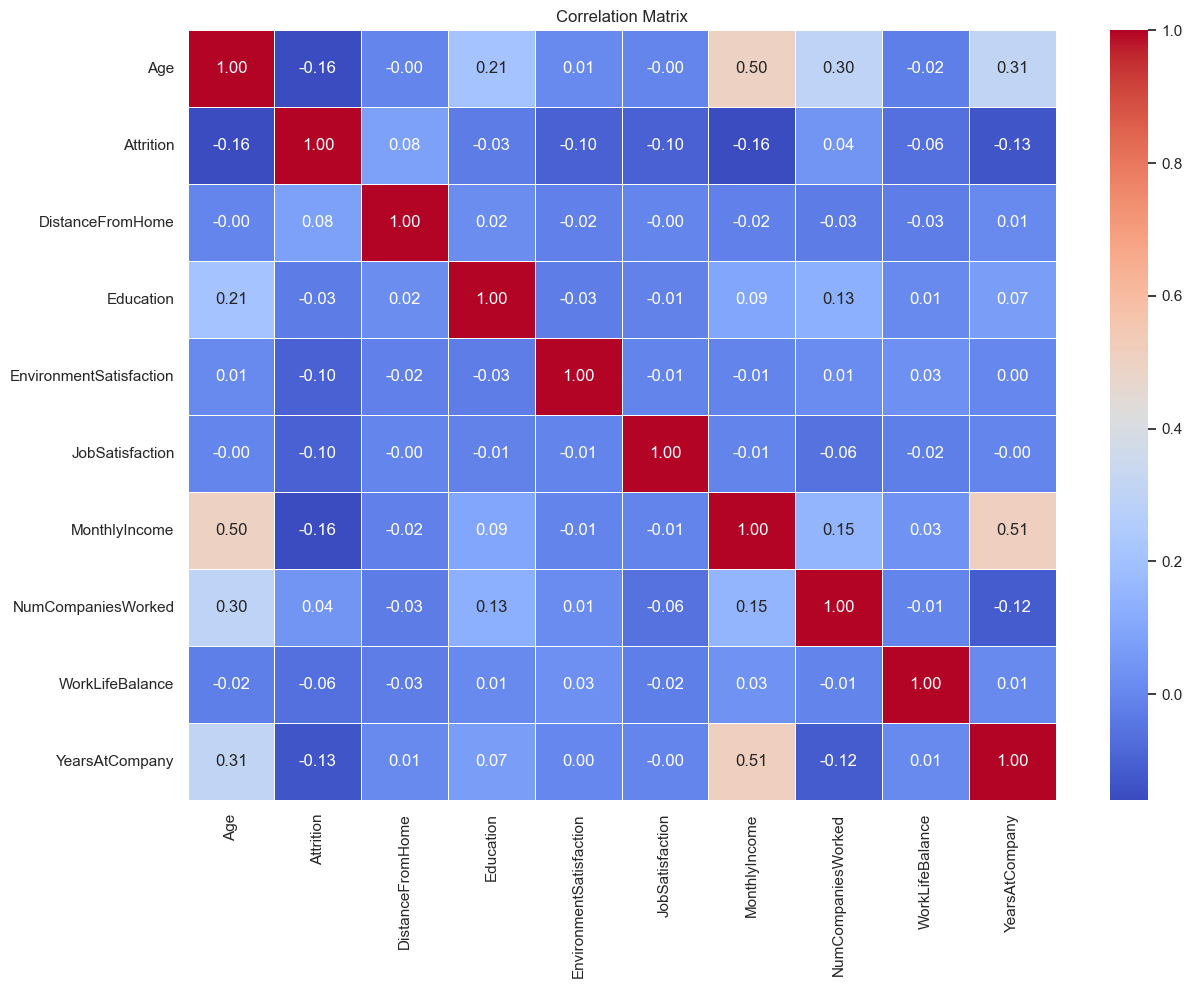

In [115]:
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- **YearsAtCompany** vs **MonthlyIncome**: `+0.51`
- **Age** vs **MonthlyIncome**: `+0.50`

These are **moderate positive correlations**, making an intuitive sense:
- The **longer** an employee stays, the **more they tend to earn**.
- The **older employees** often have **higher** salaries due to **experience or tenure**.

**Note**: These are not directly related to *Attrition*, but they do hint at patterns of career progression and potential retention factors.

#### Creating a correlation list with focus on Attrition

In [116]:
corr_with_attrition = numerical_cols.corr()["Attrition"].sort_values(ascending=False)
corr_with_attrition

Attrition                  1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
Education                 -0.031373
WorkLifeBalance           -0.063939
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
YearsAtCompany            -0.134392
Age                       -0.159205
MonthlyIncome             -0.159840
Name: Attrition, dtype: float64

Understanding the correlation with Attrition:
- Correlation values (ranging from -1 to +1) indicate how strongly two variables move together
- **Positive correlation** (+0): As one goes up, the other tends to go up.
- **Negative correlation** (-0): As one goes up, the other tends to go down.
- Near 0: No linear relationship

But **lower correlation doesn't mean more affected by attrition**.

In fact, the further away the correlation is from 0 (in either direction), the stronger the relationship. Not necessarily causation, but a measurable linear trend.
- A correlation of **-0.16** (Monthly Income) means as `income increases, attrition tends to decrease slightly`.
- A correlation of **+0.07** (Distance from home) means as `distance increases, attrition increases slightly`.

So with that said, here are the key takeaways:
- **MonthlyIncome (-0.16)**: Lower-paid employees are more likely to leave.
- **Age (-0.159)**: Younger employees are more likely to leave.
- **YearsAtCompany (-0.134)**: Longer tenure, less likely to leave.
- **JobSatisfaction (-0.103)**: As job satisfaction drops, attrition slightly increases.
- **EnvironmentSatisfaction (-0.103)**: Low satisfaction = more attrition.
- **WorkLifeBalance (-0.064)**: Slight trend: better work-life balance, less attrition
- **NumCompaniesWorked (+0.043)**: Minor link, more companies previously worked for, slightly more likely to leave
- **DistanceFromHome (+0.078)**: Slightly higher attrition with longer commutes.

**Negative Correlations (reduce attrition)**:
- Higher Age
- Higher Monthly Income
- Longer Tenure
- Better Job/Environment Satisfaction
- Better Work-Life Balance

**Positive Correlations (increase attrition)**:
- Distance from home (small effect)
- More companies worked for (tiny effect)

**Interpretation**
- Retention tends to improve with age, income, tenure and workplace satisfaction.
- Younger newer, underpaid employees with poor job satisfaction are more at risk of attrition.
- While commute distance has a small effect, it's still a potential friction point.

## Post-analysis Findings

**Age vs Attrition**
- Employees aged `28-39` account for the highest number of attritions, aligning with the company's most represented age group (30-40).
- The highest attrition percentage was found among younger employees aged 18-24 with a 39.2% attrition rate.
- A clear trend emerged showing that attrition decreases as age increases, with employees above 40 being less likely to leave.
- Scatterplots and statistical summaries show that younger employees not only leave more often but also tend to have lower salaries than their older counterparts.
- Insights: Younger employees may be leaving due to career development needs, low compensation, or workload dissatisfaction, especially in early to mid-career phases.

**DistanceFromHome vs Attrition**:
- The majority of employees reside within 0-5 km of the workplace.
- The correlation coefficient between distance and attrition is 0.078, indicating a very weak positive relationship.
- A Pearson Correlation Test returned:
  - Correlation: 0.078
  - P-value: 0.00279
- Although the p-value (< 0.05) suggests a statistically significant relationship, the weak correlation implies that distance has little practical impact on employee attrition.
- Insight: While distance might play a slight minor role in attrition, it is not a key driver of attrition in this organization.

**MonthlyIncome vs Attrition**
- The distribution of monthly income is left-skewed, indicating most employees earn between 2000-6500.
- Employees who left the company tend to fall in the lower income brackets, with an attrition rate of 17.5% in this segment.
- The average monthly income:
  - Stayed: 6832.74
  - Left: 4787.09
- Insight: There is a clear income gap between employees who stayed and those who left. This suggests that lower salary levels may be a significant contributor to attrition. Employees in the lower income range may feel undervalues or seek better financial opportunities elsewhere.

**JobSatisfaction vs Attrition**
- Most employees reported high job satisfaction:
  - Score 4 (Very High) - 459 employees
  - Score 3 (High) - 442 employees
  - Score 2 (Medium) - 280 employees
  - Score 1 (Low) - 289 employees
- Among those who left the company:
  - 73 employees had a staisfaction score of 3
  - 52 employees had a score of 4
  - 46 had a score of 2
  - 66 had a score of 1

Cross-Analysis (JobSatisfaction x MonthlyIncome x Attrition):
- Employees who left despite higher satisfaction levels (e.g. score 4) tended to have lower monthly incomes, mostly in the 3700-6200 range.
- Those with lower satisfaction scores (1 and 2) also exhibited higher attrition rates, further supporting the idea that dissatisfaction + low income = high risk of attrition.
- Insight: While job satisfaction generally aligns with retention, it's not the sole determinant. Even satisfied employees are more likely to leave if their compensation doesn't match their expectations, revealing a deeper interplay between job satisfaction and income.

**Education vs Attrition**:
- Employee educational background distribution:
  - Bachelor's Degree - 38.9%
  - Master's Degree - 27.1%
  - College Undergraduate - 19.2%
  - Below College - 11.6%
  - Doctorate - 3.3%

This distribution indicates the company has a strong preference for hiring degree holders, especially those with Bachelor's and Master's qualifications.

- Attrition breakdown by education level:
  - Bachelor's Degree - 99 employees left
  - Master's Degree - 58 left
  - College Undergraduate - 44 left
  - Below College - 31 left
  - Doctorate - 5 left
- Insight: The majority of attrition cases are among Bachelor's degree holders, likely because they make up the largest group of employees. However, when visualized through a normalized clustered bar plot, attrition appears relatively consistent across education levels, with no strong correlation between education and attrition. This suggests that education level alone is not a key driver of employee turnover in this company.

**Education Field vs Attrition**
- Employee Distribution by Education Field
  - Life Sciences – 41.2% (606 employees)
  - Medical – 31.6% (464 employees)
  - Marketing – 10.8% (159 employees)
  - Technical Degree – 9.0% (132 employees)
  - Other – 5.6% (82 employees)
  - Human Resources – 1.8% (27 employees)

- Attrition Rates by Education Field:
 - Human Resources – 26.0%
 - Technical Degree – 24.0%
 - Marketing - 22.0%
 - Life Sciences - 14.6%
 - Medical - 13.5%
 - Other 13.4%

- Observations: Fields like HR, Technical Degree and Marketing show significantly higher attrition rates compared to the company average. Fields such as Medical and Life sciences, which make up the majority of employees have relatively lower attrition rates.

Cross-analysis: *Job Satisfaction vs Attrition on each Education Field*
- **Human Resources (HR)**:
  - 7 employees left; 4 of them had Job Satisfactiion = 1
  - Overall Attrition rate: 26%
  - Low satisfaction and 86% lower average income among those who left are strong indicators of voluntary attrition due to dissatisfaction and compensation.
- **Technical Degree**:
- 32 employees left: spread across all satisfaction levels
  - Job Satisfaction = 1 : 10 left
  - Job Satisfaction = 2 : 4 left
  - Job Satisfaction = 3 : 11 left
  - Job Satisfaction = 4 : 7 left
  - Despite varying satisfaction, 41% income difference found between those who stayed vs left suggested compensation could be a major factor.
- **Marketing**:
- 35 employees left: also spread across satisfaction levels
  - Job Satisfaction = 1 : 7 left
  - Job Satisfaction = 2 : 9 left
  - Job Satisfaction = 3 : 11 left
  - Job Satisfaction = 4 : 8 left
  - 14% income difference, suggesting that factors other than salary, such as workload or role clarity, may be influencing attrition.

Cross-analysis: *Monthly Income Differences of Attritted employees and employees who stayed by Education Field*

- Human Resources: 86% income gap
- Other: 51% income gap
- Technical Degree: 41% income gap
- Life Sciences: 37% income gap
- Medical: 37% income gap
- Marketing: 14% income gap

- Insight: While most education fields show income disparities between attrited and retained employees, Human Resources stands out with a drastic 86% gap.
- This significant income gap likely contributed heavily to the high attrition rate in HR pointing to salary dissatisfaction as amajor attrition driver in that field.

**EnvironmentSatisfaction vs Attrition**

General Distribution:
- Score 3 (High) - 30.8% (453 employees)
- Score 4 (Very High) - 30.3% (446 employees)
- Score 2 (Medium) - 19.5% (287 employees)
- Score 1 (Low) - 19.3% (284 employees)
- Insight: Over 61% of employees rated their environment satisfaction at 3 or 4, indicating moderate to high satisfaction. However, nearly 39% gave a rating of 1 or 2, showing that a sizable portion of the workforce experiences low workplace satisfaction.

Environment Satisfaction by Attrition Status
- Environment Satisfaction 1 - 25.4% Attrition
- Environment Satisfaction 2 - 15% Attrition
- Environment Satisfaction 3 - 13.5% Attrition
- Environment Satisfaction 4 - 13.4% Attrition
- Insight: Employees with a score of 1 show a 25.4% attrition rate, the highest among all levels.
- While attrition is present at every satisfaction level, score 1 is a clear outlier, indicating poor environmental conditions strongly correlate with employee turnover.

Statistical Analysis:
- Average Score (Attrited Employees): 2.46
- Average Score (Stayed Employees): 2.77
- Standard Deviation (Attrited): 1.17
- Standard Deviation (Stayed): 1.06
- Median (Both Groups): 3.0
- 25th Percentile (Attrited): 1.0
- 25th Percentile (Stayed)d: 2.0
- Interpretation:
  - Attrited employees not only have lower average environment satisfaction, but also greater variability, meaning experiences are more polarized, some very dissatisfied, others neutral or satisfied.
  - The shared median (3.0) hides underlying disparities, especially seen in the lower 25th percentile (1.0) among those who left.

- Overall Insight: a low environment satisfaction score, particularly Score 1, is a strong predictor of attrition. While some employees with high satisfaction still left, the data shows that dissatisfaction with the work environment is a major contributor to employee turnover. Improving environmental factors (physical workspace, safety, office culture) could meaningfully reduce attrition, especially among the most dissatisfied groups.

**WorkLifeBalance vs Attrition**

General Score Distribution:
- Score 3 (Better): 893 employees – 60.0%
- Score 2 (Good): 344 employees – 23.4%
- Score 4 (Best): 153 employees – 10.4%
- Score 1 (Worst): 80 employees – 5.4%
- Insight: the majority of employees report a "Better" (Score 3) work-life balance, indicating overall decent conditions. However, only 10.4% experience the highest quality (Score 4), and nearly 29% report scores of 1 or 2, showing opportunities for improvement.

Work-Life Balancec by Attrition Status:
- 1 (Worst) - 31.2% Attrition
- 2 (Good) - 16.9% Attrition
- 3 (Better) - 14.2% Attrition
- 4 (Best) - 17.6% Attrition
- Insight: Score 1 has the highest attrition rate (31.2%), despite being the smallest group by volume. Score 3, though having the highest number of attrited employees (127), has a much lower attrition rate (14.2%) due to its large base. Surprisingly, even employees with Score 4 (Best) still left the company, pointing to multi-factorial causes of attrition beyond work-life balance.

Statistical Summary
- Average Score (Stayed): 2.78
- Average Score (Attrited): 2.66
- Standard Deviation (Attrited): Higher than those who stayed meaning greater fluctuation in experience.
- Interpretation: The difference in average scores (2.78 vs 2.66) is small but meaningful, indicating that poorer work-life balance may be a contributing factor, not a primary one. The higher variability among attrited employees suggests a segment may be experiencing significant dissatisfaction.

- Overall Insight: Work-life balance is not a dominant cause of attrition, but poor scores (especially Score 1) are a clear warning sign. Employees with Score 1 are more than twice as likely to leave as those scoring a 3. Even employees with strong work-life balance left the company, which reinforces that retention is influenced by a mix of factors (income, job role, environment, satisfaction).
- Actionable Opportunity: Addressing the needs of the Score 1 group could help lower the overall attrition rate. Even small improvements could create significant retention impact.

**YearsAtCompany vs Attrition**

General Distribution
- Range 0 to 40 Years
- Highest Concentration: 1-5 years
  - 1 year: 171 employees
  - 2-4 years (combined): Over 300 employees
  - 5 years: 196 employees
- Sharp decline after 10 years
- Long-tenured employees (25+ years): Extremely rare and scattered

Attrition breakdown:
- 50% of all attrited employees left within 3 years, indicating early-stage attrition as a major concern.
- 1 in 4 employees left within their first year.
- Very few employees with more than 10 years at the company have left, showing stronger retention among long-tenured staff.

Interpretation:
- The first 1-3 years are critical for employee retention efforts.
- Most attrition occurs during the early career stage at the company, possibly due to unmet expectations, onboarding issues, or lack of engagement opportunities.
- Employees who survive beyond 7-10 years are much more likely to stay longer term.

Overall Insights:
- Attrition is front-loaded, disproportionately affecting newer employees.
- Retention strategies should focus on the first 1-3 years, including:
  - Strong onboarding and mentoring programs.
  - Early development plans and engagement opportunities.
  - Competitive compensation and role clarity.
- Employees with 25+ years at the company are rare and mostly retained, likely due to deep organizational attachment or stable positions.

**MaritalStatus vs Attrition**

General Distribution
- The Marital Status variable is categorical(nominal) and includes three distinct groups:
- **Married**: 673 employees (47.4%)
- **Single**: 470 employees (33.1%)
- **Divorced**: 327 employees (23%)

Attrition breakdown:
- Single employees have the highest attrition with 25.5%, indicating more than 1 in 4 single employees leave the company.
- Married employees have 12.5% attrition percentage indicating arelatively stable status. 1 in 8 married employee leave the company.
- Divorced employees have the lowest attrition rate with 10.1%, highly stable.

Interpretation:
- Single employees are twice as likely to leave compared to married employees.
- Divorced employees show the greatest job stability, possibly due to reliance on consistent income or established routines.
- Married employees fall in the middle, showing moderate levels of attrition.

Possible drivers behind these trends:
- Single employees may face:
  - Greater job mobility or relocation flexibility.
  - Fewer family-related responsibilities anchoring them to the company.
  - Desire for faster career advancement or better opportunities.
- Divorced employees may prioritize:
  - Job security and income stability.
  - Predictable routines or benefits associated with long-term employment.

Overall Insights:
- Single = Higher risk of leaving.
- Divorced = Most stable.
- This variable can be a useful risk signal when combined with age, job role, or satisfaction scores to identify at-risk groups.

**Department vs Attrition**

General Distribution:
- Research & Development - 961 (65.7%)
- Sales - 446 (30.5%)
- Human Resources - 63 (4.3%)
- Research & Development dominates the workforce, while HR is the smallest department.

Attrition breakdown by Department:
- Sales has the highest attrition rate with 20.6%. Could be potential high-pressure.
- Human Resources follows with 19% attrition rate. May involve burnout/conflict.
- Research & Development has the lowest attrition rate with 13.8%. Relativeley stable workforce.

Cross-analysis with different variables (Age, Work-Life Balance, MonthlyIncome, Job Satisfaction & Environment Satisfaction)

MonthlyIncome vs Department per Attrition:
- Sales had a 18% income difference between Attrited employees and employees who stayed.
- Human Resources had a 49% income gap, leavers earn much less than those who stayed.
- Research & Development had a 38% income gap.
- Lower income likely contributed to attrition.

Breakdown: 
Sales Department
- Smaller income gap (18%) suggests that salary is not the dominant driver of attrition here.
- Other factors may be influencing turnover:
  - High performance targets
  - Role stress
  - Work-life balance
- Even decent pay may not be enough to retain Sales employees if job stress remains unaddressed.

Human Resources
- Largest income disparity (49%) between leavers and stayers.
- Strong signal that lower compensation is directly tied to attrition in HR.
- Hr staff with lower pay are far more likely to leave, possibly due to feeling undervalued or lacking career growth.

Research & Development
- 38% income gap also indicates salary plays a considerable role in retention.
- Those who stayed in R&D tend to have higher salaries — possibly linked to:
  - Promotions
  - Greater technical experience
  - Retention through compensation incentives

Insights for MonthlyIncome vs Department per Attrition
- Salary is a key attrition driver for HR and R&D, but less so for Sales.
- In Sales, non-monetary factors (pressure, stress, KPIs) might need more attention.
- For HR and R&D, salary adjustments, role-based bonuses, or clearer promotion pathways may help retain talent more effectively.

We dove deeper into Sales Department's Attrition data to reveal several more important insights about why this group had the highest attrition rate (20.6%)d across all departments.

Age vs Department per Attrition
- Younger employees (under 30) had the highest attrition rate (32.6%), followed closely by those aged 30-35 (31.5%)
- A majority (39.1%)d of employees who left had been with the company for less than 2 years, indicating early-stage turnover.
- High Attrition among newer hires suggest potential onboarding, cultural or expectation mismatches.

Work-life balance, Job Satisfaction & Environmental Satisfaction
- Work-Life Balance was rated relatively well: most employees who left scored it a 3 (54.3%) with very few rating it poorly.
- Job Satisfaction and Environment Satisfaction were also faily balanced, showing no extreme dissatisfaction among those who left.
- The data indicates that dissatisfaction was not the core driver of attrition in the Sales Department.

Education & Career Progression
- A significant share (42.4%) of Sales employees who left held a Bachelor's degree
- Higher education levels may increase ambition or mobility, suggesting attrition could be opportunity-driven, not problem-driven.

Likely Underlying Factors behind the Sales Department Attrition
- Given that satisfaction metrics were moderate, and most leavers were relatively young, new and educated, we propose the following potential explanations:
  - Career Mobility: Employees may have used the role as a stepping stone, leaving for higher-paying or growth-oriented opportunities.
  - Organizational restructuring: A company-driven factor as worforce downsizing or role redefinition may have prompted exits.
  - Performance pressure: Sales roles often invole target-driven stress not captured in Job Satisfaction Surveys.

Final Insight
Sales Department Attrition is not driven by dissatisfaction, but rather by a mix of early-career volatitlity, competitive ambition, and possibly internal restructuring or performance pressures.

## Recommendation to Reduce Attrition Rate

1. Improve Early-Stage Onboarding & Engagement
 - Insight: 50% of employees who left did so within their first 3 years, with 39.1% in Sales leaving within 0–2 years.
 -  Action:

- Implement structured onboarding programs and mentorships.

- Conduct regular 30-, 60-, and 90-day check-ins.

- Provide clear career growth paths early on.


2. Focus Retention Efforts on Younger and Single Employees
 - Insight: Younger (≤30 years) and Single employees have the highest attrition rates (32.6% and 25.5%, respectively).
 - Action:

    - Offer flexible schedules and hybrid/remote work options.
    
    - Organize employee engagement activities targeted toward younger demographics.
    
    - Introduce early-career development or fast-track programs.

3. Address Sales Department Attrition with Role-Specific Strategies
  - Insight: Sales had the highest attrition rate (20.6%), yet satisfaction and salary metrics were not major concerns.
  - Possible Cause: Organizational restructuring or misaligned job expectations.
  - Action:

    - Conduct exit interviews and pulse surveys to uncover department-specific pain points.
    
    - Offer alternative career paths within the company (e.g., Sales Ops, Marketing).
    
    - Improve role clarity and manage performance expectations realistically.

4. Boost Job & Environment Satisfaction in HR and R&D
    - Insight: HR employees who left had low job (2.2) and environment satisfaction, while R&D showed a pattern of drop-off after 5–7 years.
  - Action:

    - Conduct targeted feedback sessions in HR and R&D.
    
    - Introduce employee well-being programs (mental health, workload management).
    
    - Invest in ergonomic improvements and team-building for better work environments.

5. Create Salary Equity and Progression Transparency
 - Insight: Employees who left had significantly lower salaries than those who stayed, especially in R&D (38% gap) and HR (49% gap).
 - Action:

    - Audit pay structures and adjust compensation bands.
    
    - Communicate how performance, tenure, or skills translate into raises/promotions.
    
    - Consider retention bonuses or milestone-based incentives.

6. Monitor and Improve Work-Life Balance Holistically
 - Insight: WLB wasn’t the primary issue in Sales, but HR and R&D employees with poor WLB ratings were more likely to leave.
 - Action:

    - Normalize boundaries (discourage late work emails, offer recharge days).
    
    - Offer flex-hours or compressed work weeks in high-burnout departments.